

<p align="center"><strong> MohammadAmin M. Shabestari </strong></p>
---

04/17/2025

[LinkedIn Profile](https://www.linkedin.com/in/mohammadamin-shabestari) | [GitHub Profile](https://github.com/Msh8303)  
✉️ **Email:** shabestari8303p@gmail.com  

---


# 📊 **Dataset Analysis**

## 🏦 **Introduction to the Dataset**

The dataset contains **credit card transactions** made by cardholders. The main objective of this dataset is to identify fraudulent transactions based on the transaction details. It's a **binary classification** problem where the goal is to predict whether a transaction is fraudulent or not.

- **Target variable**: `Class`
    - **0** = Non-fraudulent transaction
    - **1** = Fraudulent transaction

### 🔗 **Access the dataset here:** [Fraud detection dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

---

## 🧳 **Features**

The dataset consists of various features related to the transaction and the cardholder's activities. These features are as follows:

- **Time**: The number of seconds elapsed between this transaction and the first transaction in the dataset.
- **V1 - V28**: These are anonymized features generated using PCA (Principal Component Analysis) to ensure data privacy. These features represent different aspects of the transaction but are not directly interpretable.
- **Amount**: The monetary value of the transaction.
- **Class**: The target variable, which indicates whether the transaction was fraudulent (1) or not (0).

### 📑 **Feature Summary:**
- **28 anonymized features** (V1 to V28), which are transformed using PCA to reduce dimensionality while preserving the variance.
- **1 numerical feature**: `Amount` which represents the transaction value.
- **1 categorical feature**: `Class` (fraudulent or non-fraudulent).

---

## 🧮 **Class Distribution**

The target variable (`Class`) is **highly imbalanced**, with very few fraudulent transactions (Class = 1) compared to non-fraudulent transactions (Class = 0). This is a key aspect of this dataset and presents a challenge when building classification models.


---

# 🖥️ **Code Analysis**

## 📚 **Importing Libraries**

In this section, we import the necessary libraries required


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import product

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

from imblearn.combine import SMOTEENN

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression




## ⚙️ **Define Device for Model Training**

In this part of the code, we define the device that will be used to run the model. We check if a CUDA-compatible GPU is available:

- If a GPU is available, the model will use the GPU to speed up computation.
- If no GPU is available, the model will default to using the CPU.


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else None)
device


## 📥 **Reading Dataset**

Here, the dataset is loaded into a pandas DataFrame.

In [ ]:
df = pd.read_csv('creditcard.csv' )
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0



## 🔍 **Check for Dataset and Missing Values**

After loading the dataset, we check the structure of the data and look for any missing values:

- **`df.info()`**: This provides a summary of the dataset, including the number of entries, column names, and data types.
- **`df.isnull().value_counts()`**: This helps identify if any of the columns have missing values by counting `True` and `False` entries for each column.

These steps ensure that the dataset is clean and ready for further analysis or model training.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,284807


## 📊 **Data Visualization**

### **Pie chart**

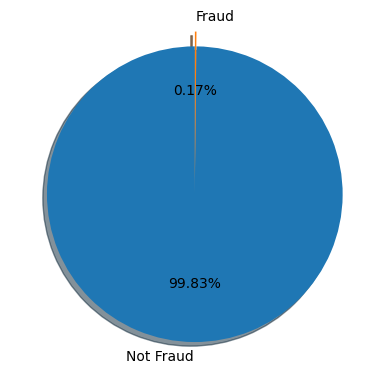

In [ ]:
fig, ax = plt.subplots()
ax.pie(df['Class'].value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%1.2f%%', startangle=90, explode=[0,0.1], shadow=True)
plt.show()

### **Bar chart**

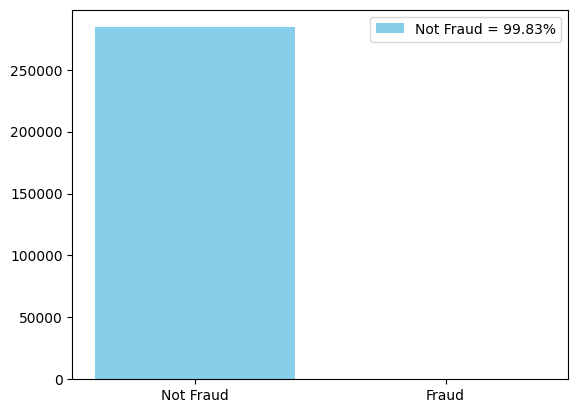

In [ ]:
class_counts = df['Class'].value_counts()
labels = ['Not Fraud', 'Fraud']
total_counts = class_counts.sum()

colors = ['skyblue', 'blue']

percentage = class_counts / total_counts * 100
legend_ = [
    f'{labels[0]} = {percentage[0]:.2f}%',
    f'{labels[1]} = {percentage[1]:.2f}%'
]

fig, ax = plt.subplots()
bar_plot = plt.bar(labels, class_counts, color=colors)
ax.legend(legend_)

### **Log Transformation of Amount**


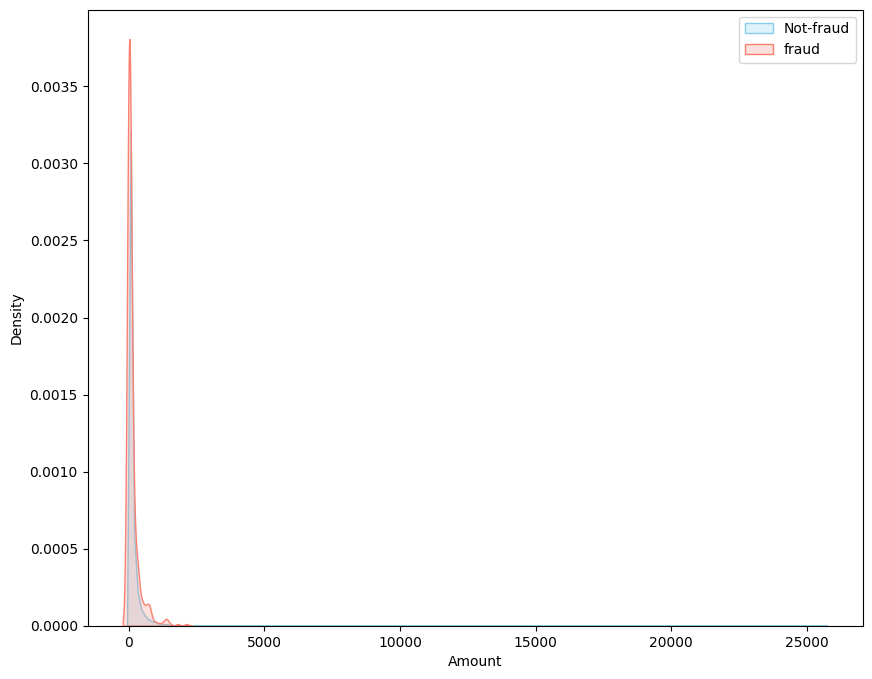

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(df[df['Class'] == 0]['Amount'], label = 'Not-fraud', fill = True, color='skyblue')
sns.kdeplot(df[df['Class'] == 1]['Amount'], label = 'fraud', fill = True, color='salmon')

plt.legend()
plt.show()

- 	Both distributions are right-skewed, meaning most transactions are low in value.
- Fraud and non-fraud distributions overlap heavily, suggesting transaction amount alone is not enough to detect fraud.
- Fraud occurs at low transaction amounts, contrary to the assumption that fraud involves large amounts.
- The density for non-fraud is much higher, reflecting that fraud cases are rare in the dataset.


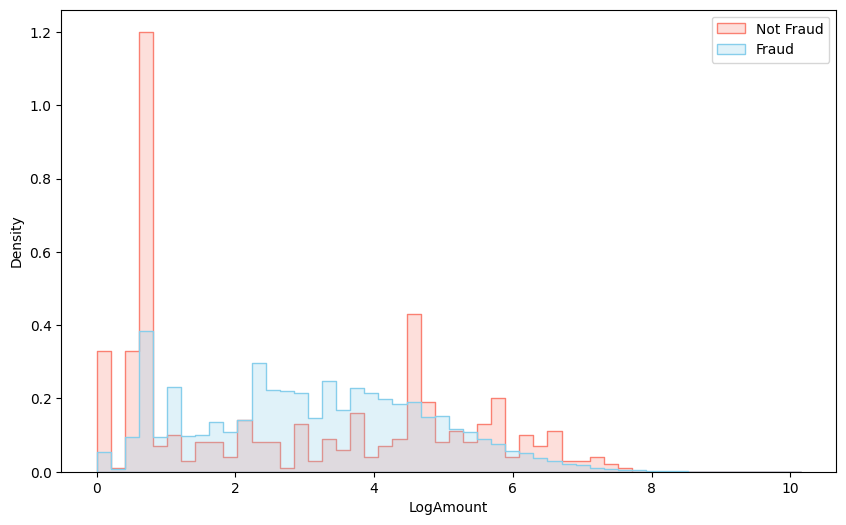

In [ ]:
df['LogAmount'] = np.log1p(df['Amount'])
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = 'LogAmount', hue = 'Class', bins=  50, element='step', stat='density', common_norm=False, palette=['skyblue', 'salmon'])
plt.legend(['Not Fraud', 'Fraud'])
plt.show()


### **Feature Correlation Heatmap**

A heatmap is plotted to show the correlation between different features in the dataset. Correlation values close to 1 or -1 indicate strong relationships between features, while values close to 0 indicate weak or no correlation. This step helps us understand which features might be important for the model.


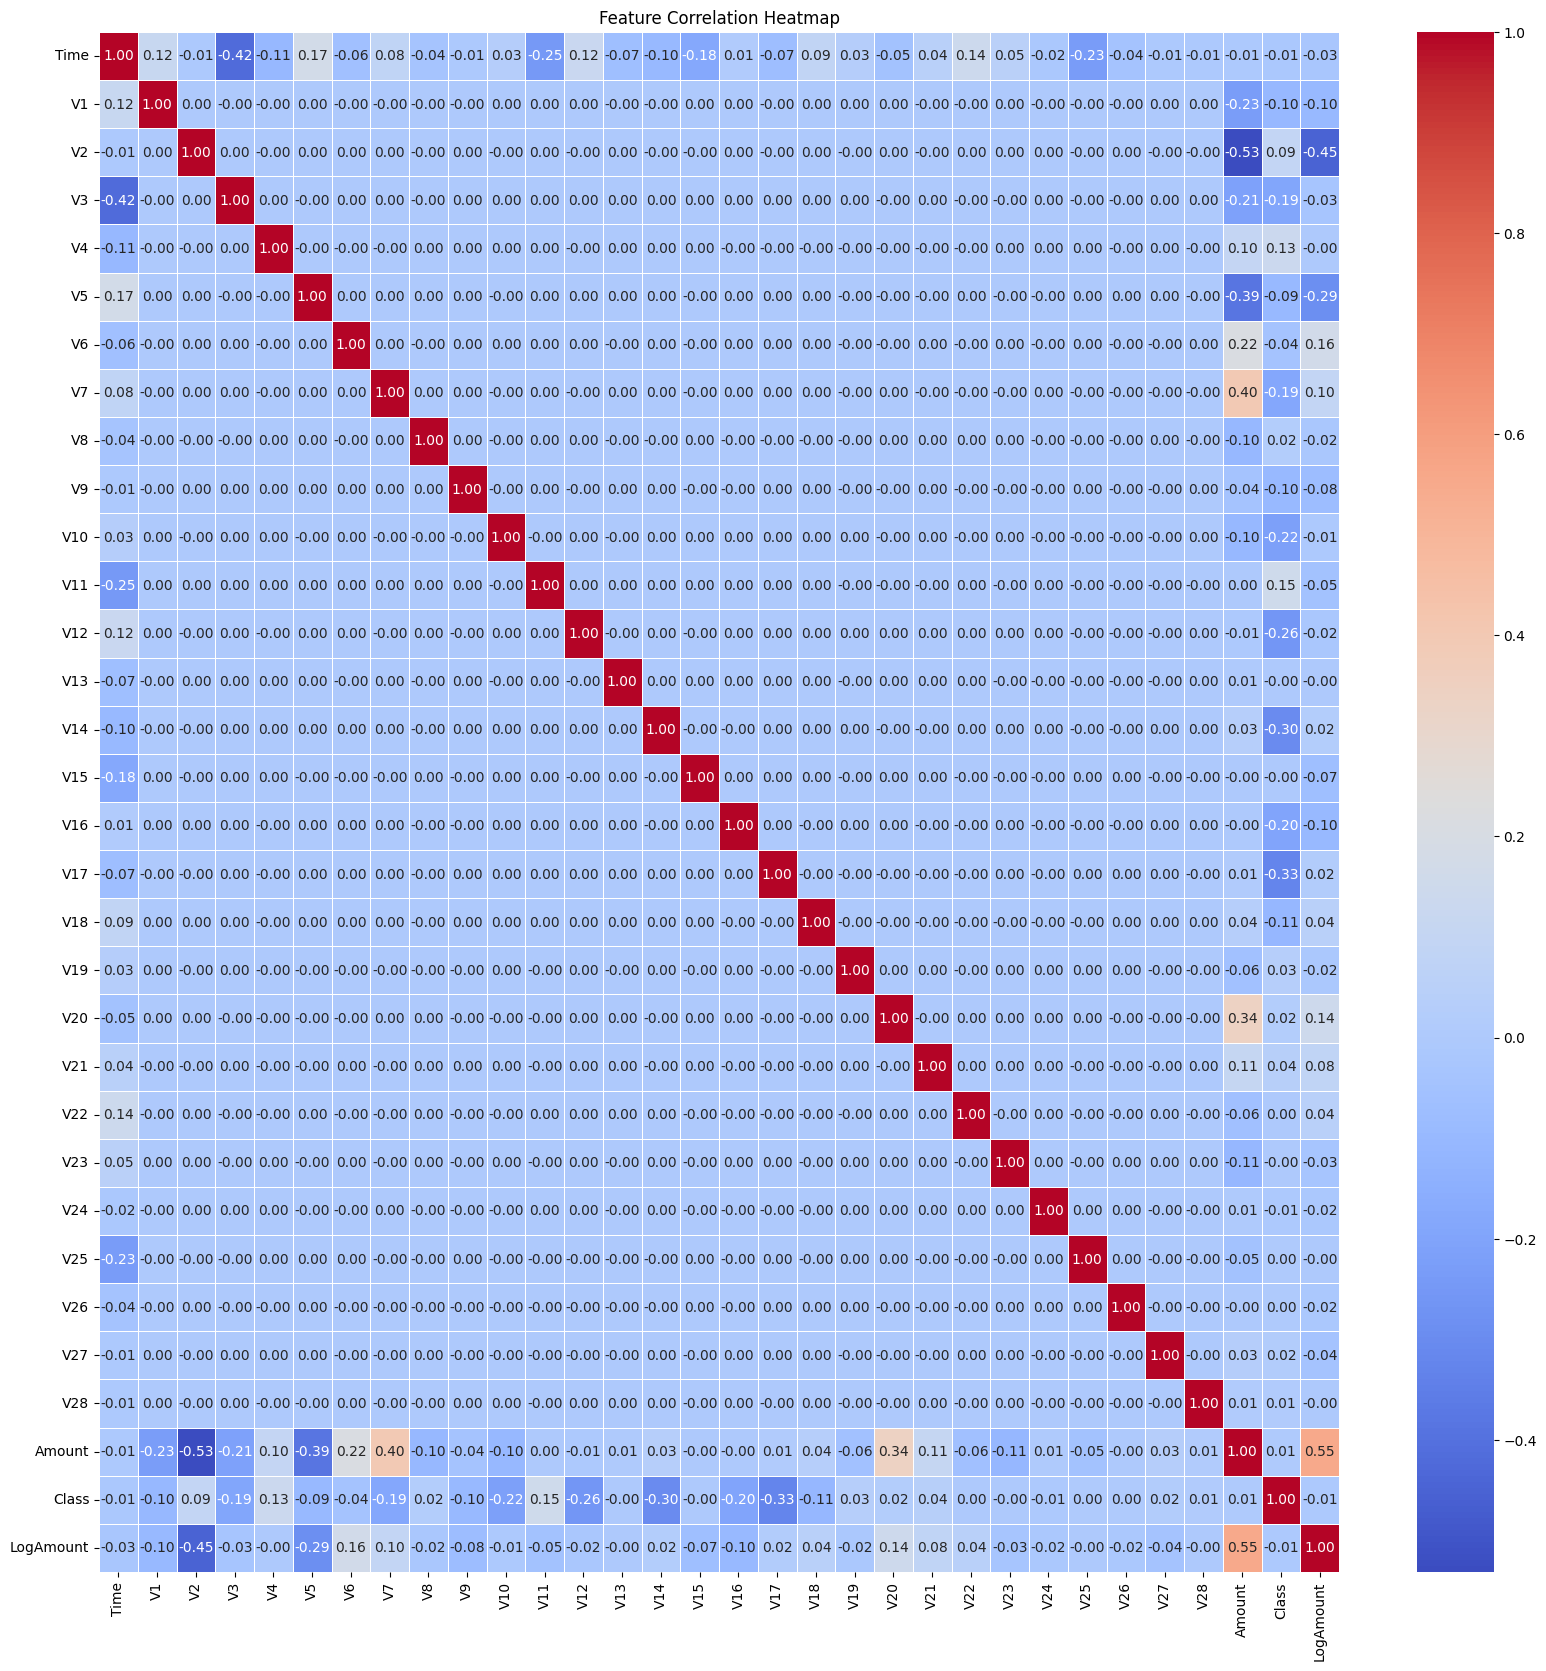

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df[df.columns].corr(), annot=True, cmap='coolwarm', fmt = '.2f', linewidths= 0.5 )
plt.title('Feature Correlation Heatmap')
plt.show()



### **Fraud Transactions by Hour**

We extract the hour of the day from the `Time` feature and analyze the number of fraud and non-fraud transactions that occur during each hour. This allows us to identify any patterns or trends in fraud activity throughout the day.

We plot the number of fraud and non-fraud transactions for each hour in separate subplots to compare them visually. This helps us understand if fraud occurs more often during certain hours of the day.

In [ ]:
df['Hour'] = (df['Time'] // 3600 % 24).astype(int)
df['Hour']

fraud_by_hour = df[df['Class'] == 1]['Hour'].value_counts().sort_index()
not_fraud_by_hour = df[df['Class'] == 0]['Hour'].value_counts().sort_index()

fraud_by_hour

,count
Hour,
0,6
1,10
2,57
3,17
4,23
5,11
6,9
7,23
8,9


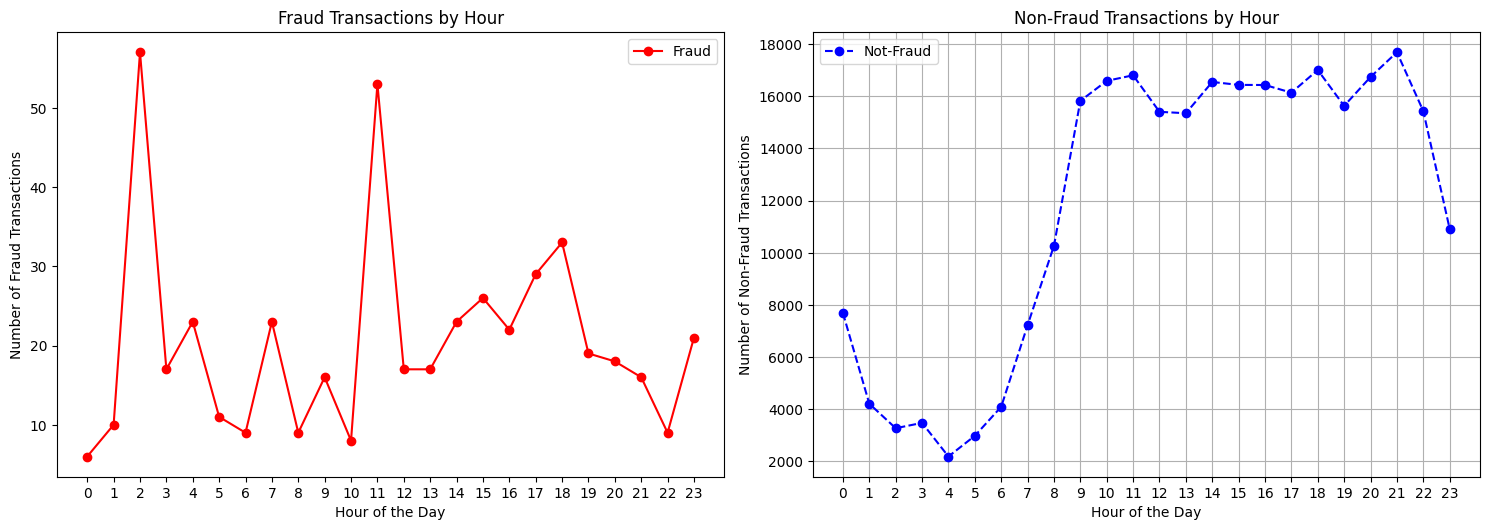

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(fraud_by_hour.index, fraud_by_hour.values, label='Fraud', color='red', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraud Transactions')
plt.title('Fraud Transactions by Hour')
plt.xticks(range(24))
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(not_fraud_by_hour.index, not_fraud_by_hour.values, label='Not-Fraud', color='blue', linestyle='--', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Non-Fraud Transactions')
plt.title('Non-Fraud Transactions by Hour')
plt.grid(True)
plt.xticks(range(24))
plt.legend()

plt.tight_layout()
plt.show()

## 🧹 Data Preprocessing

Before training any neural network model, preprocessing the data is a crucial step to ensure that the learning algorithm performs efficiently and effectively. This section covers everything from feature normalization to dataset splitting and tensor preparation.



### 🧪 Feature Normalization

We use StandardScaler to normalize our input features.

- **Why?**  
  Neural networks, especially those trained with gradient descent, benefit from input features that are centered (mean = 0) and scaled (standard deviation = 1).

- **Benefits:**  
  - Faster convergence  
  - Smoother loss landscape  
  - Reduced chances of getting stuck in local minima  

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']
(y == 1).value_counts()


,count
Class,
False,284315
True,492


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


### 🔀 Dataset Splitting

After normalization, the dataset is split into three parts:

- Training Set (70%) – Used to train the model.  
- Validation Set (15%) – Used to tune hyperparameters and prevent overfitting.  
- Test Set (15%) – Used to evaluate the final performance.

Stratification is used to maintain the same class distribution in each subset as the original dataset.  
This is especially important in imbalanced datasets, such as fraud detection tasks.


In [ ]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, stratify=y_tmp, random_state=42)

(y_train == 1).value_counts(), (y_val == 1).value_counts(), (y_test == 1).value_counts()

(Class
 False    199020
 True        344
 Name: count, dtype: int64,
 Class
 False    42647
 True        74
 Name: count, dtype: int64,
 Class
 False    42648
 True        74
 Name: count, dtype: int64)

### 📦 Tensor Preparation

To use the dataset with PyTorch, we need to convert our data into tensors and move them to the appropriate device (CPU or GPU).

- The normalized NumPy arrays are converted into PyTorch tensors.  
- Features (X) and labels (y) are both cast to floating-point tensors.  
- These tensors are moved to the device using `torch.device("cuda" if available else "cpu")`.

This ensures full compatibility with PyTorch’s computation graph and training pipeline.


In [ ]:
tensor_x_train = torch.Tensor(X_train).float().to(device)
tensor_x_val   = torch.Tensor(X_val).float().to(device)
tensor_x_test  = torch.Tensor(X_test).float().to(device)

tensor_y_train = torch.Tensor(np.asarray(y_train)).float().to(device)
tensor_y_val   = torch.Tensor(np.asarray(y_val)).float().to(device)
tensor_y_test  = torch.Tensor(np.asarray(y_test)).float().to(device)


## 🧠 Model Architecture and Training Pipeline

This section introduces the neural network architectures and the supporting components I developed for training, evaluation, and optimization.


## 🔧 Neural Network Architectures

I implemented two neural network architectures using PyTorch:

- **Simple Network (`Network`)**: A feedforward neural network with one hidden layer. It supports optional dropout for regularization and L2 penalty.
- **Deep Network (`Network_deep`)**: A more complex model with two hidden layers. This network also allows the use of dropout and L2 regularization.

Both classes include helper methods to:

- Initialize an **Adam optimizer** with optional L2 regularization.
- Choose a **loss function** based on whether class balancing is needed. If class imbalance exists, it supports weighted binary cross-entropy loss.


In [ ]:
class Network(nn.Module):

    def __init__(self,
                 input_features,
                 hidden_size1,
                 output_size,
                 dropout = False,
                 regularization = False,
                 dropout_rate = 0.3,
                 lambda_l2 = 0.0001):

        super(Network, self).__init__()
        self.fc1 = nn.Linear(input_features, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, output_size)

        self.dropout = nn.Dropout(dropout_rate) if dropout else None
        self.regularization = regularization
        self.lambda_l2 = lambda_l2 if regularization else 0.0

    def forward(self, x):
        x = F.relu(self.fc1(x))
        if self.dropout:
            x = self.dropout(x)
        x = self.fc2(x)

        return x

    def get_optimizer(self, lr = 0.001):
         return optim.Adam(self.parameters(), lr=lr, weight_decay=self.lambda_l2)

    def get_loss_function(self, class_weights_value= None, class_weights = False ):
        if class_weights:
            return nn.BCEWithLogitsLoss(pos_weight = class_weights_value)
        else:
            return nn.BCEWithLogitsLoss()





In [ ]:
class Network_deep(nn.Module):

    def __init__(self,
                 input_features,
                 hidden_size1,
                 hidden_size2,
                 output_size,
                 dropout = False,
                 regularization = False,
                 dropout_rate = 0.3,
                 lambda_l2 = 0.0001):

        super(Network_deep, self).__init__()
        self.fc1 = nn.Linear(input_features, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

        self.dropout = nn.Dropout(dropout_rate) if dropout else None
        self.regularization = regularization
        self.lambda_l2 = lambda_l2 if regularization else 0.0

    def forward(self, x):
        x = F.relu(self.fc1(x))
        if self.dropout:
            x = self.dropout(x)
        x = F.relu(self.fc2(x))
        if self.dropout:
            x = self.dropout(x)
        x = self.fc3(x)

        return x

    def get_optimizer(self, lr = 0.001):
         return optim.Adam(self.parameters(), lr=lr, weight_decay=self.lambda_l2)

    def get_loss_function(self, class_weights_value = None, class_weights = False ):
        if class_weights:
            return nn.BCEWithLogitsLoss(pos_weight = class_weights_value)
        else:
            return nn.BCEWithLogitsLoss()


### ⏹️ Early Stopping

An `earlystopping` utility class is used to prevent overfitting by halting training if the validation loss does not improve for a specified number of epochs (`patience`). It monitors the validation loss and triggers early termination if no significant improvement (greater than `min_delta`) is observed.


In [ ]:


class earlystopping:
    def __init__(self, patience=15, min_delta=0.01, verbose=True):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if (self.best_loss - val_loss) > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print(f"Early stopping triggered. No improvement for {self.patience} epochs.")
        return self.early_stop

    def reset(self):
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False


### 📉 Loss Visualization

To visualize training performance, I use interactive line plots (via Plotly) that compare training and validation loss across epochs. This helps in identifying overfitting or underfitting trends.


In [ ]:
def plot_losses(train_loss, val_loss_):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=list(range(len(train_loss))),
        y=train_loss,
        mode='lines+markers',
        name='Train Loss',
        line=dict(color='royalblue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(len(val_loss_))),
        y=val_loss_,
        mode='lines+markers',
        name='Validation Loss',
        line=dict(color='firebrick')
    ))

    fig.update_layout(
        title='Training vs Validation Loss',
        xaxis_title='Epochs',
        yaxis_title='Loss',
        template='plotly_white',
        hovermode='x unified'
    )
    fig.show()



### 🏋️ Training Pipeline

The training process includes:

- Creating data loaders from the training and validation sets.
- Calculating class weights if the dataset is imbalanced and integrating them into the loss function.
- Iteratively training the model over a defined number of epochs.
- Monitoring validation loss to apply early stopping when appropriate.
- Visualizing loss history after training is complete.


In [ ]:
def train_model(model,
                x_train,
                y_train,
                x_valid,
                y_valid,
                epochs = 40,
                batch_size = 32, pos_w = False):


    model = model.to(device)

    train_loss = []
    val_loss_ = []

    if pos_w:
        class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train.cpu().numpy())
        pos_weights = torch.tensor(class_weights[1] / class_weights[0], dtype=torch.float32).to(device)

        criterion = model.get_loss_function(pos_weights, class_weights = True)
    else:

        criterion = model.get_loss_function()

    earlystopping_ = earlystopping(patience=5)
    optimizer = model.get_optimizer(lr = 0.001)

    train_dataset = TensorDataset(x_train, y_train.float().view(-1,1))
    train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle= True)

    valid_dataset = TensorDataset(x_valid, y_valid.float().view(-1,1))
    valid_dataloader = DataLoader(valid_dataset, batch_size = batch_size)

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0

        for x_batch, y_batch in train_dataloader:

            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            out = model(x_batch)
            loss = criterion(out, y_batch)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()


        average_loss = epoch_loss / len(train_dataloader)
        train_loss.append(average_loss)

        model.eval()
        epoch_loss_val = 0

        with torch.no_grad():
            for x_batch, y_batch in valid_dataloader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                validation_out = model(x_batch)
                val_loss = criterion(validation_out, y_batch)
                epoch_loss_val += val_loss.item()

            average_loss_val = epoch_loss_val / len(valid_dataloader)
            val_loss_.append(average_loss_val)

            print(f'Train:  epoch {epoch + 1}/{epochs} - Loss: {average_loss: .2f} -------- Validation: epoch {epoch + 1}/{epochs} - Loss: {average_loss_val: .2f}')

            if earlystopping_(average_loss_val):
                break


    plot_losses(train_loss, val_loss_)

    return train_loss, val_loss

### 🧪 Evaluation and Testing

The evaluation function measures model performance on unseen test data. It calculates and visualizes:

- Confusion matrix
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC score
- ROC curve (True Positive Rate vs False Positive Rate)

These metrics help in comprehensively assessing the binary classification performance of the model.


In [ ]:
def test_model(model, x_test, y_test):


    model.eval()

    with torch.no_grad():
        output = model(x_test)
        probability = torch.sigmoid(output)
        pred = (probability > 0.5).int()

    y_true = y_test.cpu().numpy()
    y_pred = pred.cpu().numpy()
    y_prob = probability.cpu().numpy()

    print('\nConfusion Matrix:')
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)


    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")


    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc
    }
    return metrics





## 1️⃣ Models with Unbalanced Data


=== Training Base Model ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.00
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.00
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.00
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.00
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.00
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.00
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


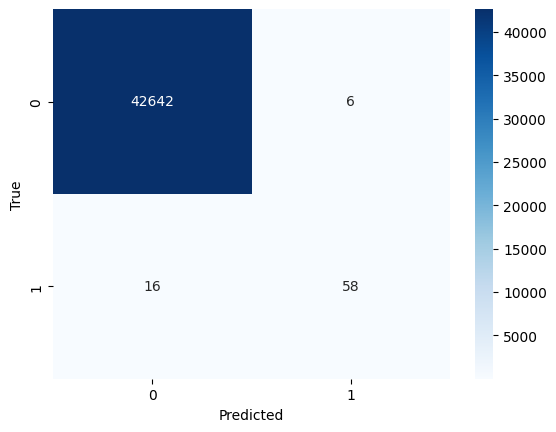


Accuracy: 0.9995
Precision: 0.9062
Recall: 0.7838
F1-Score: 0.8406
AUC: 0.9816


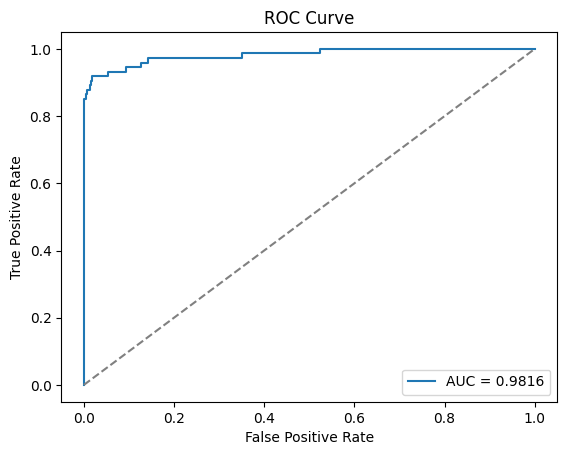


=== Training + Dropout ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.00
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.00
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.00
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.00
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.00
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.00
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


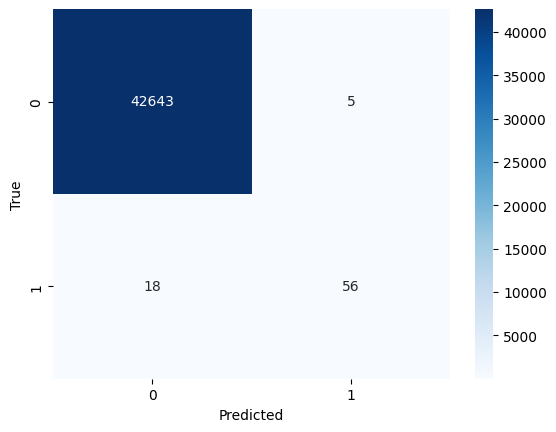


Accuracy: 0.9995
Precision: 0.9180
Recall: 0.7568
F1-Score: 0.8296
AUC: 0.9818


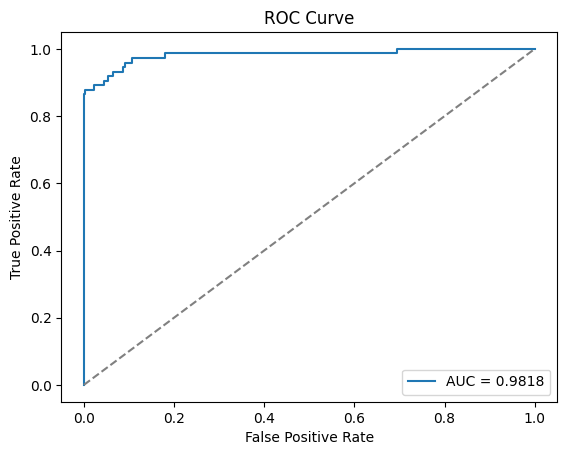


=== Training + L2 ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.00
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.00
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.00
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.00
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.00
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.00
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


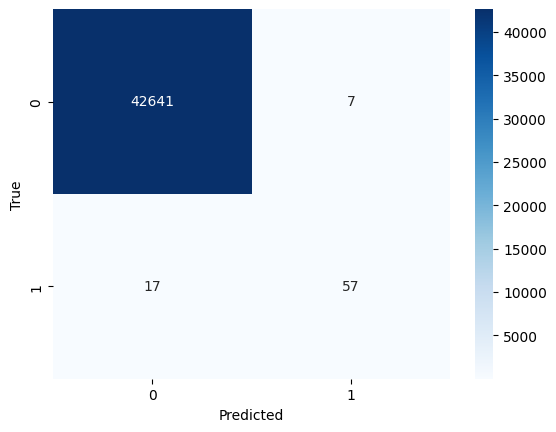


Accuracy: 0.9994
Precision: 0.8906
Recall: 0.7703
F1-Score: 0.8261
AUC: 0.9571


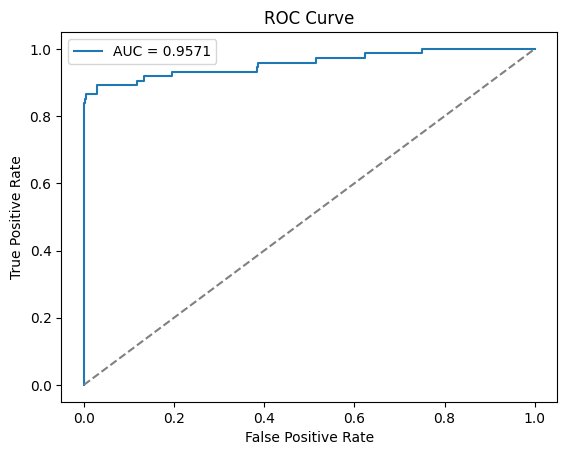


=== Training + Dropout + L2 ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.00
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.00
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.00
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.00
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.00
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.00
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


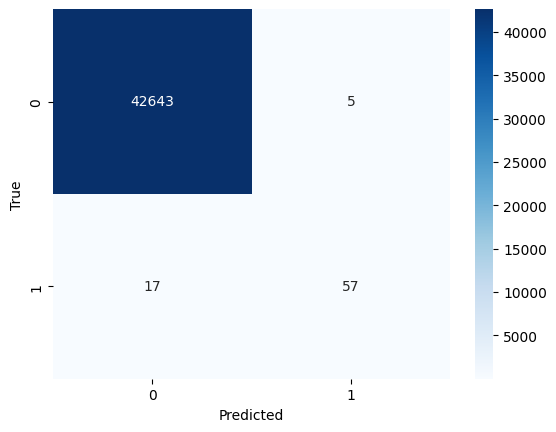


Accuracy: 0.9995
Precision: 0.9194
Recall: 0.7703
F1-Score: 0.8382
AUC: 0.9784


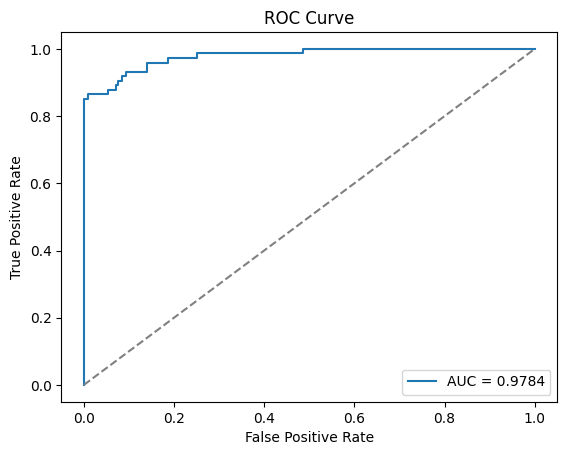

In [ ]:
configs_simple = [
    {'dropout': False, 'regularization': False, 'name': 'Base Model'},
    {'dropout': True, 'regularization': False, 'name': '+ Dropout'},
    {'dropout': False, 'regularization': True, 'name': '+ L2'},
    {'dropout': True, 'regularization': True, 'name': '+ Dropout + L2'}
]

for config in configs_simple:
    print(f"\n=== Training {config['name']} ===")

    model_simple1 = Network(
        input_features=tensor_x_train.shape[1],
        hidden_size1=64,
        output_size=1,
        dropout=config['dropout'],
        regularization=config['regularization'],
        dropout_rate=0.3
    )
    train_model(model_simple1, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=40, batch_size=32, pos_w = False)
    test_model(model_simple1, tensor_x_test, tensor_y_test)

## 2️⃣ Models with Unbalanced Data and Weighted Loss (`pos_w=True`)


=== Training Base Model ===
Train:  epoch 1/40 - Loss:  0.38 -------- Validation: epoch 1/40 - Loss:  0.38
Train:  epoch 2/40 - Loss:  0.30 -------- Validation: epoch 2/40 - Loss:  0.41
Train:  epoch 3/40 - Loss:  0.21 -------- Validation: epoch 3/40 - Loss:  0.52
Train:  epoch 4/40 - Loss:  0.22 -------- Validation: epoch 4/40 - Loss:  0.46
Train:  epoch 5/40 - Loss:  0.16 -------- Validation: epoch 5/40 - Loss:  0.47
Train:  epoch 6/40 - Loss:  0.14 -------- Validation: epoch 6/40 - Loss:  0.60
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


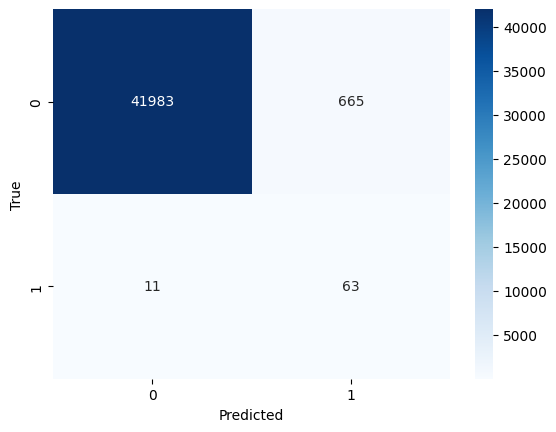


Accuracy: 0.9842
Precision: 0.0865
Recall: 0.8514
F1-Score: 0.1571
AUC: 0.9723


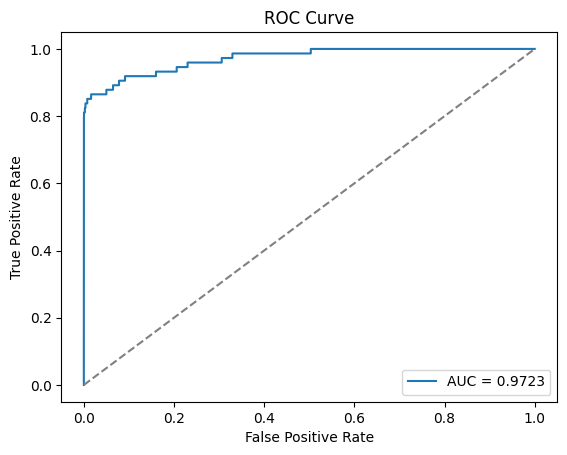


=== Training + Dropout ===
Train:  epoch 1/40 - Loss:  0.56 -------- Validation: epoch 1/40 - Loss:  0.43
Train:  epoch 2/40 - Loss:  0.31 -------- Validation: epoch 2/40 - Loss:  0.48
Train:  epoch 3/40 - Loss:  0.30 -------- Validation: epoch 3/40 - Loss:  0.52
Train:  epoch 4/40 - Loss:  0.30 -------- Validation: epoch 4/40 - Loss:  0.54
Train:  epoch 5/40 - Loss:  0.26 -------- Validation: epoch 5/40 - Loss:  0.59
Train:  epoch 6/40 - Loss:  0.23 -------- Validation: epoch 6/40 - Loss:  0.54
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


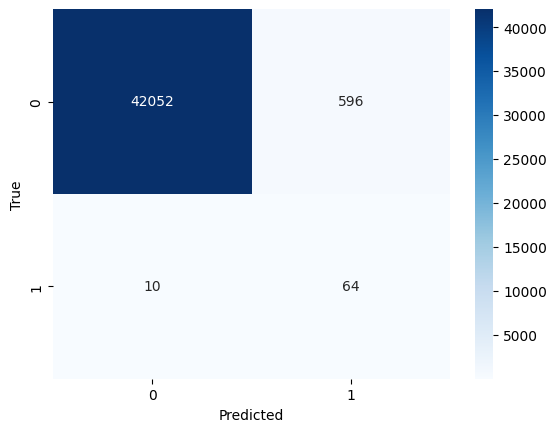


Accuracy: 0.9858
Precision: 0.0970
Recall: 0.8649
F1-Score: 0.1744
AUC: 0.9716


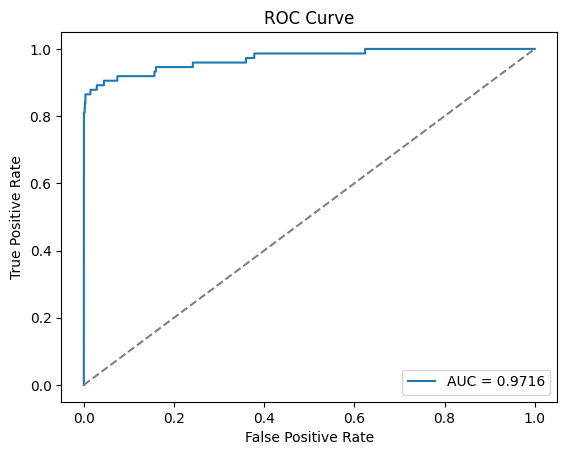


=== Training + L2 ===
Train:  epoch 1/40 - Loss:  0.39 -------- Validation: epoch 1/40 - Loss:  0.42
Train:  epoch 2/40 - Loss:  0.26 -------- Validation: epoch 2/40 - Loss:  0.43
Train:  epoch 3/40 - Loss:  0.21 -------- Validation: epoch 3/40 - Loss:  0.51
Train:  epoch 4/40 - Loss:  0.18 -------- Validation: epoch 4/40 - Loss:  0.49
Train:  epoch 5/40 - Loss:  0.17 -------- Validation: epoch 5/40 - Loss:  0.56
Train:  epoch 6/40 - Loss:  0.15 -------- Validation: epoch 6/40 - Loss:  0.63
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


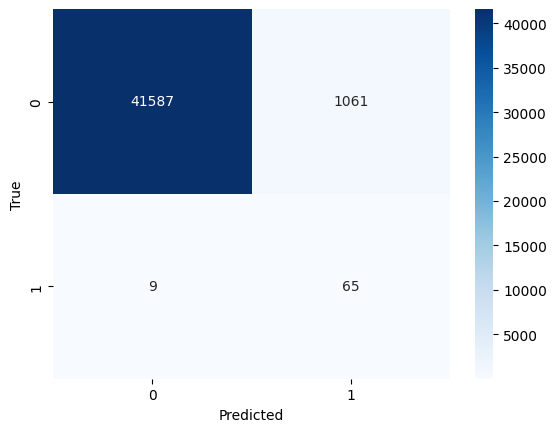


Accuracy: 0.9750
Precision: 0.0577
Recall: 0.8784
F1-Score: 0.1083
AUC: 0.9847


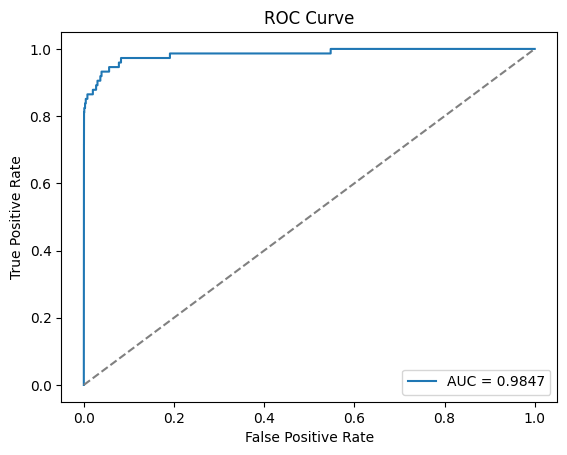


=== Training + Dropout + L2 ===
Train:  epoch 1/40 - Loss:  0.46 -------- Validation: epoch 1/40 - Loss:  0.38
Train:  epoch 2/40 - Loss:  0.35 -------- Validation: epoch 2/40 - Loss:  0.37
Train:  epoch 3/40 - Loss:  0.29 -------- Validation: epoch 3/40 - Loss:  0.43
Train:  epoch 4/40 - Loss:  0.27 -------- Validation: epoch 4/40 - Loss:  0.60
Train:  epoch 5/40 - Loss:  0.25 -------- Validation: epoch 5/40 - Loss:  0.61
Train:  epoch 6/40 - Loss:  0.23 -------- Validation: epoch 6/40 - Loss:  0.56
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


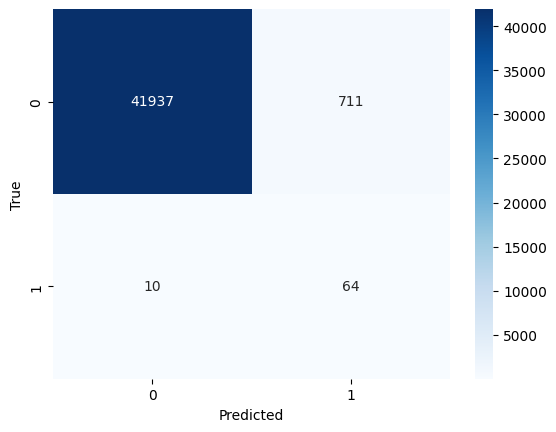


Accuracy: 0.9831
Precision: 0.0826
Recall: 0.8649
F1-Score: 0.1508
AUC: 0.9765


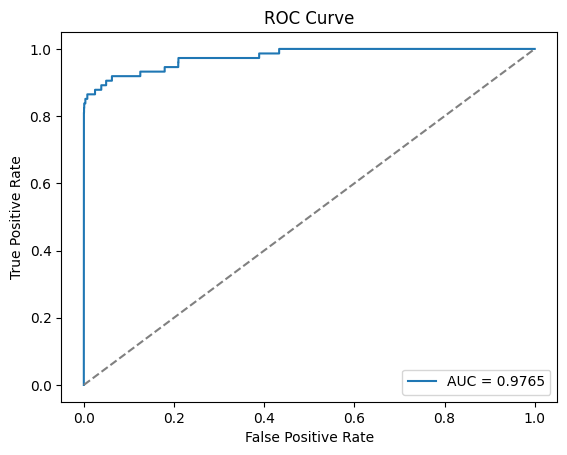

In [ ]:
configs_simple = [
    {'dropout': False, 'regularization': False, 'name': 'Base Model'},
    {'dropout': True, 'regularization': False, 'name': '+ Dropout'},
    {'dropout': False, 'regularization': True, 'name': '+ L2'},
    {'dropout': True, 'regularization': True, 'name': '+ Dropout + L2'}
]

for config in configs_simple:
    print(f"\n=== Training {config['name']} ===")

    model_simple = Network(
        input_features=tensor_x_train.shape[1],
        hidden_size1=64,
        output_size=1,
        dropout=config['dropout'],
        regularization=config['regularization'],
        dropout_rate=0.3
    )
    train_model(model_simple, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=40, batch_size=32, pos_w=True)
    test_model(model_simple, tensor_x_test, tensor_y_test)

## 3️⃣ Models with Unbalanced Data and Deep Network


=== Training Base Model ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.00
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.00
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.00
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.00
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.00
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.00
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


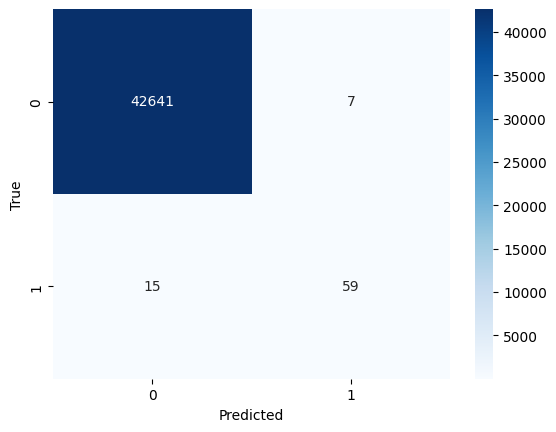


Accuracy: 0.9995
Precision: 0.8939
Recall: 0.7973
F1-Score: 0.8429
AUC: 0.9780


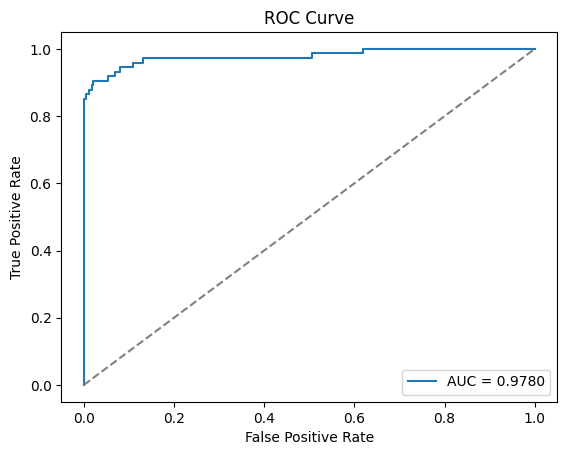


=== Training + Dropout ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.00
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.00
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.00
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.00
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.00
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.00
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


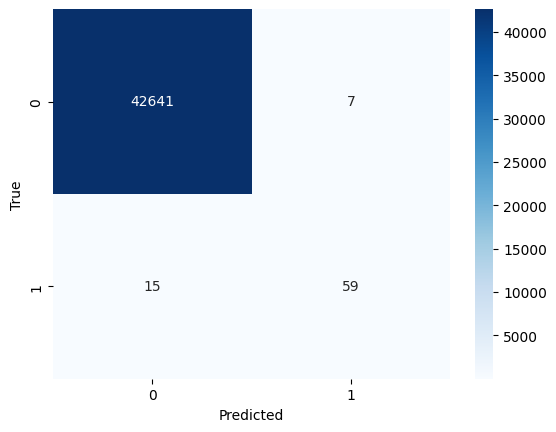


Accuracy: 0.9995
Precision: 0.8939
Recall: 0.7973
F1-Score: 0.8429
AUC: 0.9785


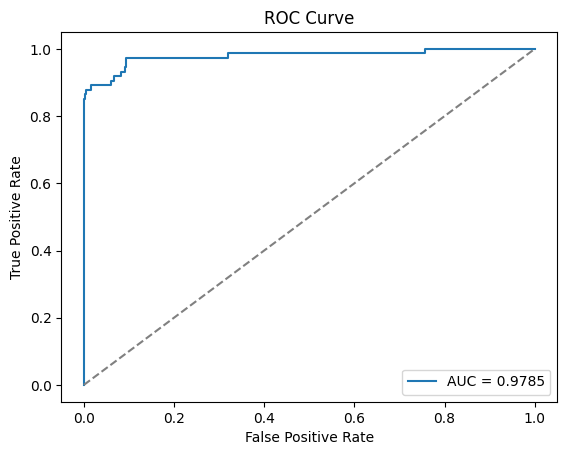


=== Training + L2 ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.00
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.00
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.00
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.00
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.00
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.00
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


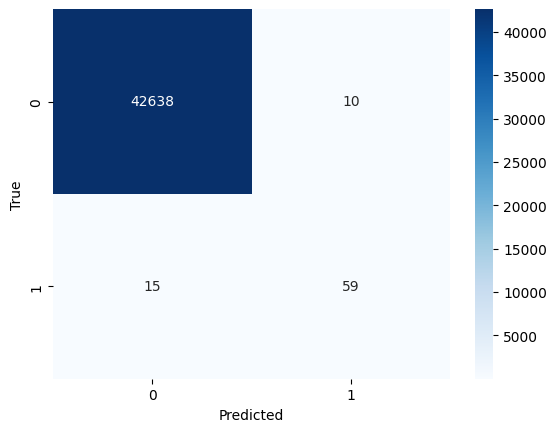


Accuracy: 0.9994
Precision: 0.8551
Recall: 0.7973
F1-Score: 0.8252
AUC: 0.9593


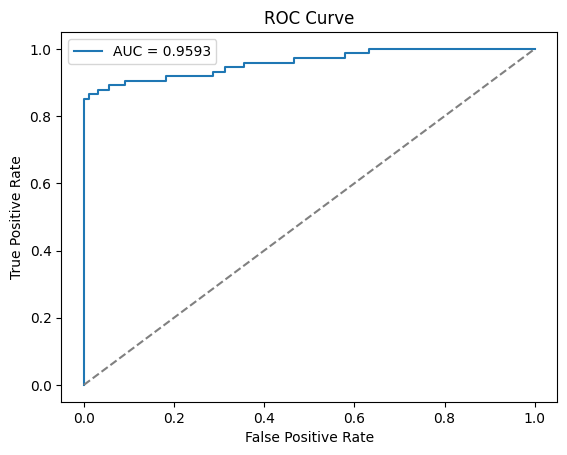


=== Training + Dropout + L2 ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.00
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.00
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.00
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.00
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.00
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.00
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


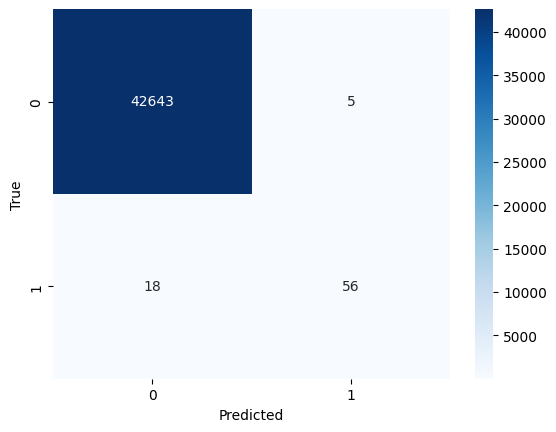


Accuracy: 0.9995
Precision: 0.9180
Recall: 0.7568
F1-Score: 0.8296
AUC: 0.9694


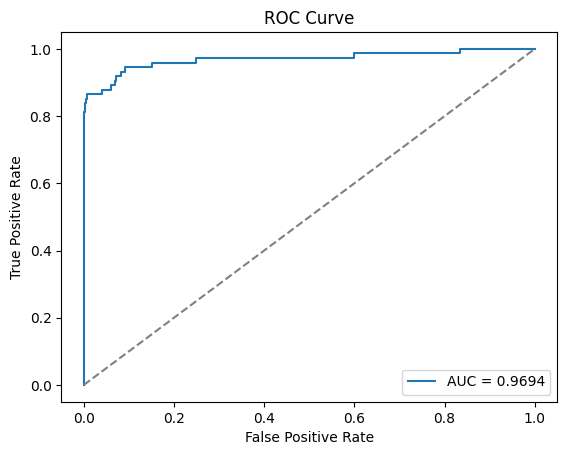

In [ ]:
configs_deep = [
    {'dropout': False, 'regularization': False, 'name': 'Base Model'},
    {'dropout': True, 'regularization': False, 'name': '+ Dropout'},
    {'dropout': False, 'regularization': True, 'name': '+ L2'},
    {'dropout': True, 'regularization': True, 'name': '+ Dropout + L2'}
]

for config in configs_deep:
    print(f"\n=== Training {config['name']} ===")

    model_deep = Network_deep(
        input_features=tensor_x_train.shape[1],
        hidden_size1=128,
        hidden_size2=64,
        output_size=1,
        dropout=config['dropout'],
        regularization=config['regularization'],
        dropout_rate=0.2
    )

    train_model(model_deep, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=40, batch_size=32, pos_w=False)
    test_model(model_deep, tensor_x_test, tensor_y_test)


## 4️⃣ Models with Unbalanced Data, Deep Network, and Weighted Loss (`pos_w=True`)



=== Training Base Model ===
Train:  epoch 1/40 - Loss:  0.88 -------- Validation: epoch 1/40 - Loss:  0.42
Train:  epoch 2/40 - Loss:  0.34 -------- Validation: epoch 2/40 - Loss:  0.37
Train:  epoch 3/40 - Loss:  0.34 -------- Validation: epoch 3/40 - Loss:  0.74
Train:  epoch 4/40 - Loss:  0.34 -------- Validation: epoch 4/40 - Loss:  0.97
Train:  epoch 5/40 - Loss:  0.30 -------- Validation: epoch 5/40 - Loss:  0.68
Train:  epoch 6/40 - Loss:  0.34 -------- Validation: epoch 6/40 - Loss:  1.01
Train:  epoch 7/40 - Loss:  0.38 -------- Validation: epoch 7/40 - Loss:  2.14
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


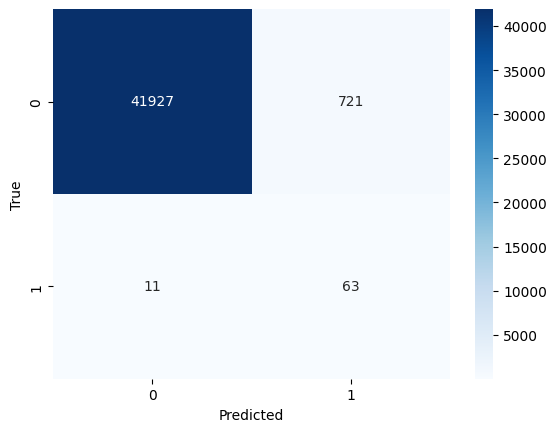


Accuracy: 0.9829
Precision: 0.0804
Recall: 0.8514
F1-Score: 0.1469
AUC: 0.9211


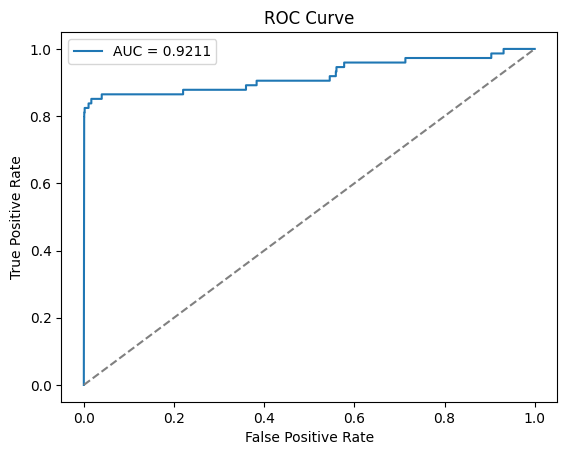


=== Training + Dropout ===
Train:  epoch 1/40 - Loss:  0.73 -------- Validation: epoch 1/40 - Loss:  0.39
Train:  epoch 2/40 - Loss:  0.34 -------- Validation: epoch 2/40 - Loss:  0.39
Train:  epoch 3/40 - Loss:  0.39 -------- Validation: epoch 3/40 - Loss:  1.15
Train:  epoch 4/40 - Loss:  0.36 -------- Validation: epoch 4/40 - Loss:  0.43
Train:  epoch 5/40 - Loss:  0.31 -------- Validation: epoch 5/40 - Loss:  0.41
Train:  epoch 6/40 - Loss:  0.30 -------- Validation: epoch 6/40 - Loss:  0.48
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


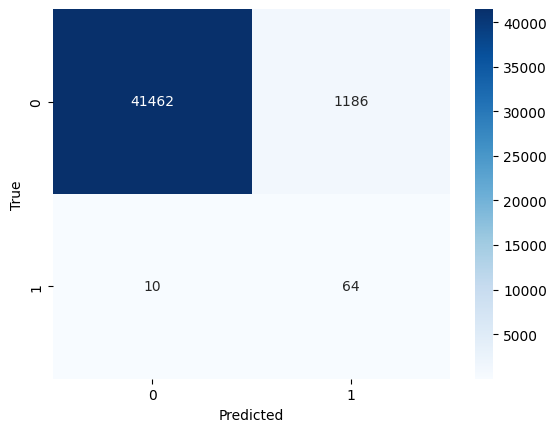


Accuracy: 0.9720
Precision: 0.0512
Recall: 0.8649
F1-Score: 0.0967
AUC: 0.9653


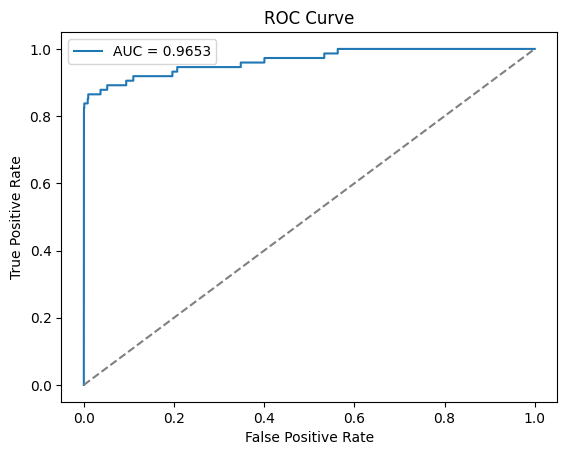


=== Training + L2 ===
Train:  epoch 1/40 - Loss:  0.48 -------- Validation: epoch 1/40 - Loss:  0.41
Train:  epoch 2/40 - Loss:  0.55 -------- Validation: epoch 2/40 - Loss:  2.31
Train:  epoch 3/40 - Loss:  0.91 -------- Validation: epoch 3/40 - Loss:  2.37
Train:  epoch 4/40 - Loss:  0.96 -------- Validation: epoch 4/40 - Loss:  2.14
Train:  epoch 5/40 - Loss:  1.18 -------- Validation: epoch 5/40 - Loss:  2.74
Train:  epoch 6/40 - Loss:  1.55 -------- Validation: epoch 6/40 - Loss:  4.39
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


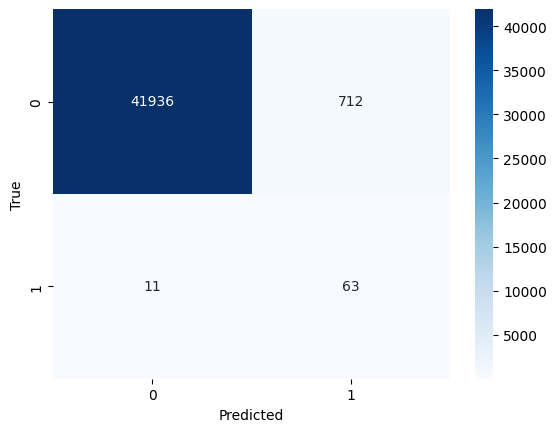


Accuracy: 0.9831
Precision: 0.0813
Recall: 0.8514
F1-Score: 0.1484
AUC: 0.9528


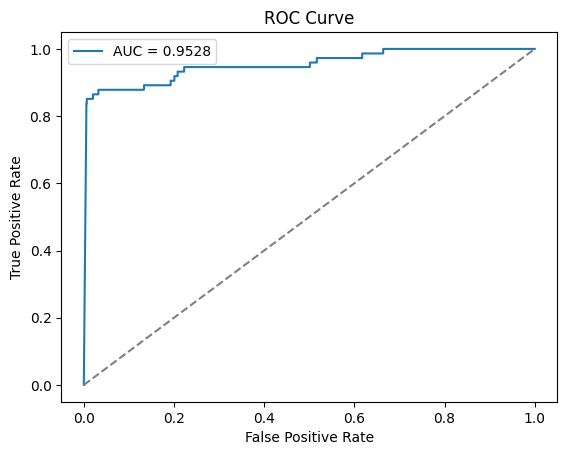


=== Training + Dropout + L2 ===
Train:  epoch 1/40 - Loss:  0.64 -------- Validation: epoch 1/40 - Loss:  0.43
Train:  epoch 2/40 - Loss:  0.46 -------- Validation: epoch 2/40 - Loss:  0.64
Train:  epoch 3/40 - Loss:  0.97 -------- Validation: epoch 3/40 - Loss:  0.67
Train:  epoch 4/40 - Loss:  0.81 -------- Validation: epoch 4/40 - Loss:  3.30
Train:  epoch 5/40 - Loss:  1.24 -------- Validation: epoch 5/40 - Loss:  2.41
Train:  epoch 6/40 - Loss:  2.47 -------- Validation: epoch 6/40 - Loss:  2.53
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


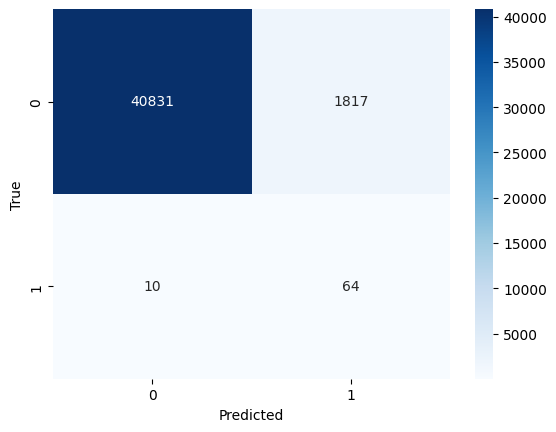


Accuracy: 0.9572
Precision: 0.0340
Recall: 0.8649
F1-Score: 0.0655
AUC: 0.9531


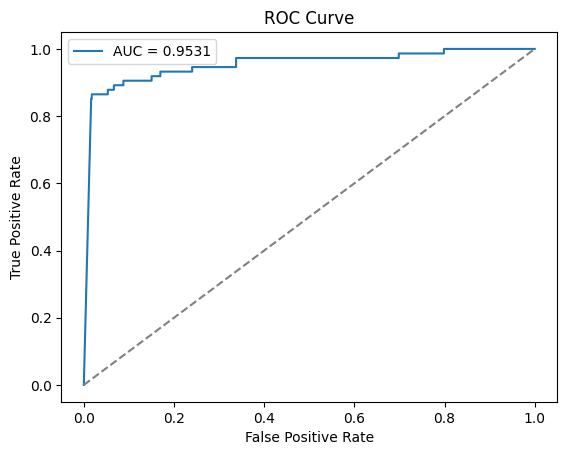

In [ ]:
configs_deep = [
    {'dropout': False, 'regularization': False, 'name': 'Base Model'},
    {'dropout': True, 'regularization': False, 'name': '+ Dropout'},
    {'dropout': False, 'regularization': True, 'name': '+ L2'},
    {'dropout': True, 'regularization': True, 'name': '+ Dropout + L2'}
]

for config in configs_deep:
    print(f"\n=== Training {config['name']} ===")

    model_deep = Network_deep(
        input_features=tensor_x_train.shape[1],
        hidden_size1=128,
        hidden_size2=64,
        output_size=1,
        dropout=config['dropout'],
        regularization=config['regularization'],
        dropout_rate=0.2
    )

    train_model(model_deep, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=40, batch_size=32, pos_w=True)
    test_model(model_deep, tensor_x_test, tensor_y_test)

## Balancing Data with SMOTE-ENN

SMOTE-ENN is a hybrid oversampling-undersampling technique that combines the Synthetic Minority Over-sampling Technique (SMOTE) and the Edited Nearest Neighbors (ENN) algorithm. It aims to balance the class distribution by generating synthetic minority class samples and cleaning the dataset by removing noisy or borderline instances.


In [ ]:
print("Before SMOTE-ENN:", Counter(y))

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print("After SMOTE-ENN:", Counter(y_resampled))

Before SMOTE-ENN: Counter({0: 284315, 1: 492})
After SMOTE-ENN: Counter({1: 190538, 0: 182347})


###  Visualization of Balanced Dataset
#### Pie Chart

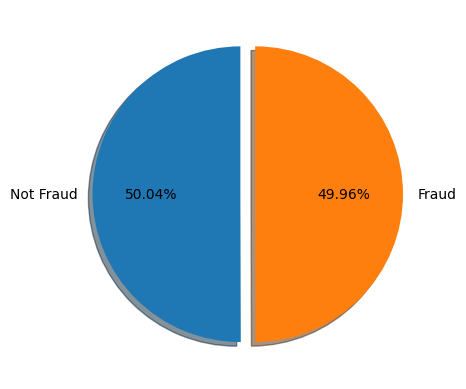

In [ ]:
fig, ax = plt.subplots()
ax.pie(y_resampled.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%1.2f%%', startangle=90, explode=[0,0.1], shadow=True)
plt.show()

#### Bar Chart

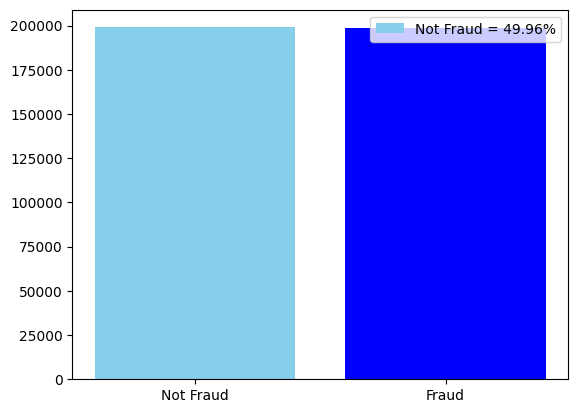

In [ ]:
class_counts = y_resampled.value_counts()
labels = ['Not Fraud', 'Fraud']
total_counts = class_counts.sum()

colors = ['skyblue', 'blue']

percentage = class_counts / total_counts * 100
legend_ = [
    f'{labels[0]} = {percentage[0]:.2f}%',
    f'{labels[1]} = {percentage[1]:.2f}%'
]

fig, ax = plt.subplots()
bar_plot = plt.bar(labels, class_counts, color=colors)
ax.legend(legend_)

In [ ]:
tensor_x_train_resampled = torch.Tensor(X_resampled).float().to(device)
tensor_y_train_resampled = torch.Tensor(np.asarray(y_resampled)).float().to(device)

## 1️⃣ Simple Network Model with Balanced Dataset


=== Training Base Model ===
Train:  epoch 1/40 - Loss:  0.03 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.01
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.01
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.02
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.02
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.02
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


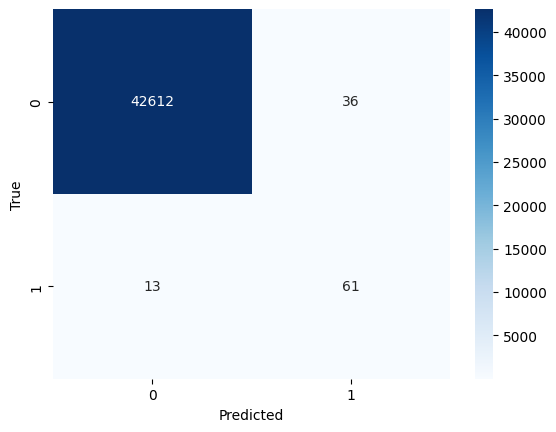


Accuracy: 0.9989
Precision: 0.6289
Recall: 0.8243
F1-Score: 0.7135
AUC: 0.9753


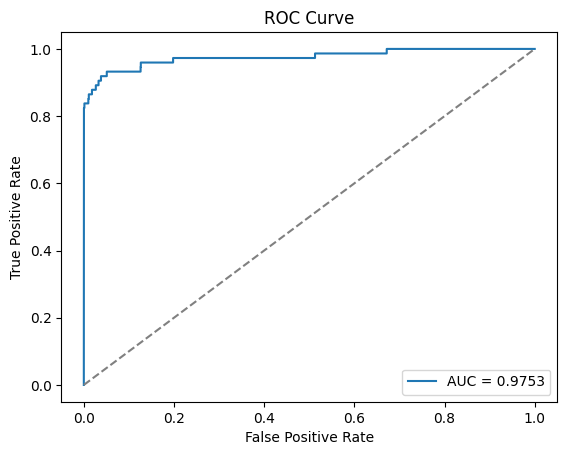


=== Training + Dropout ===
Train:  epoch 1/40 - Loss:  0.03 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.01 -------- Validation: epoch 2/40 - Loss:  0.01
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.02
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.02
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.02
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.02
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


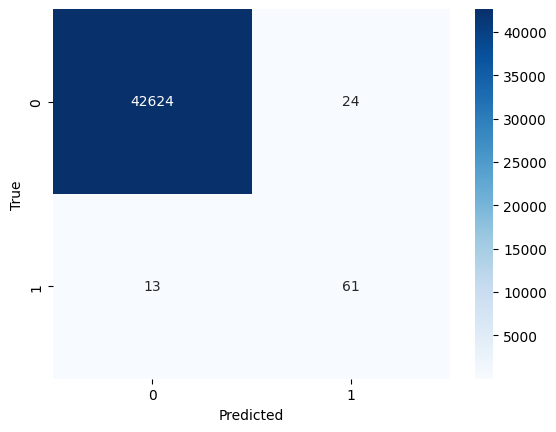


Accuracy: 0.9991
Precision: 0.7176
Recall: 0.8243
F1-Score: 0.7673
AUC: 0.9765


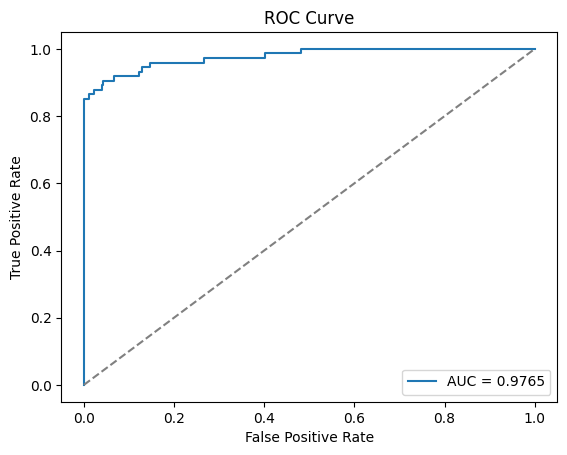


=== Training + L2 ===
Train:  epoch 1/40 - Loss:  0.03 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.02
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.01
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.01
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.01
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.01
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


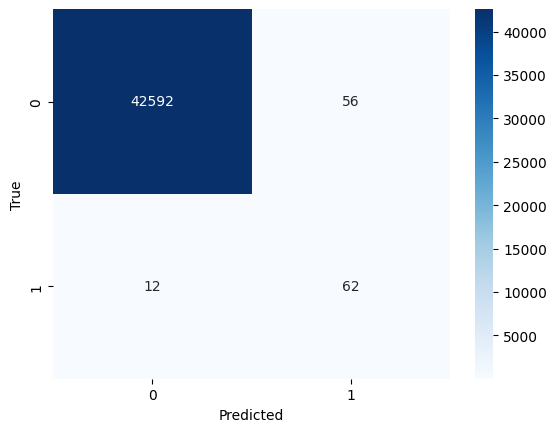


Accuracy: 0.9984
Precision: 0.5254
Recall: 0.8378
F1-Score: 0.6458
AUC: 0.9796


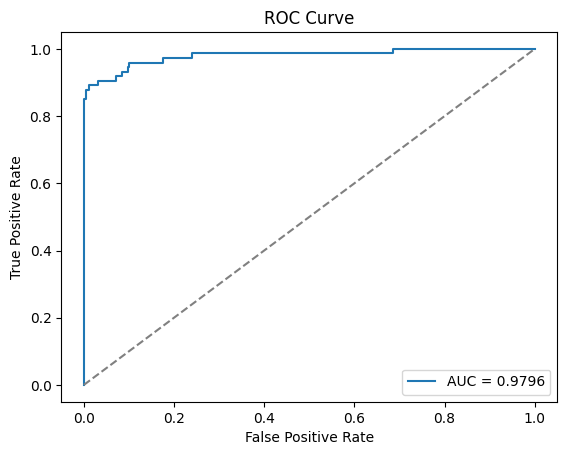


=== Training + Dropout + L2 ===
Train:  epoch 1/40 - Loss:  0.03 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.01 -------- Validation: epoch 2/40 - Loss:  0.01
Train:  epoch 3/40 - Loss:  0.01 -------- Validation: epoch 3/40 - Loss:  0.01
Train:  epoch 4/40 - Loss:  0.01 -------- Validation: epoch 4/40 - Loss:  0.02
Train:  epoch 5/40 - Loss:  0.01 -------- Validation: epoch 5/40 - Loss:  0.01
Train:  epoch 6/40 - Loss:  0.01 -------- Validation: epoch 6/40 - Loss:  0.01
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


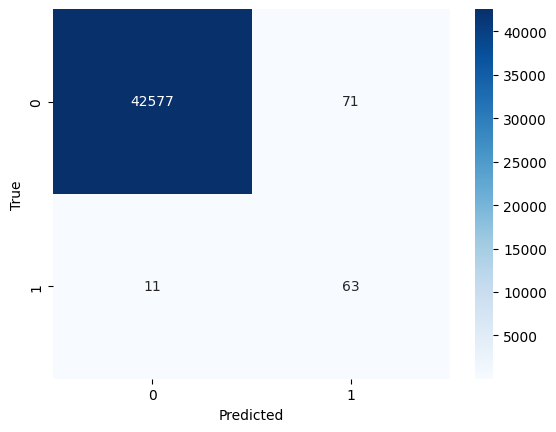


Accuracy: 0.9981
Precision: 0.4701
Recall: 0.8514
F1-Score: 0.6058
AUC: 0.9791


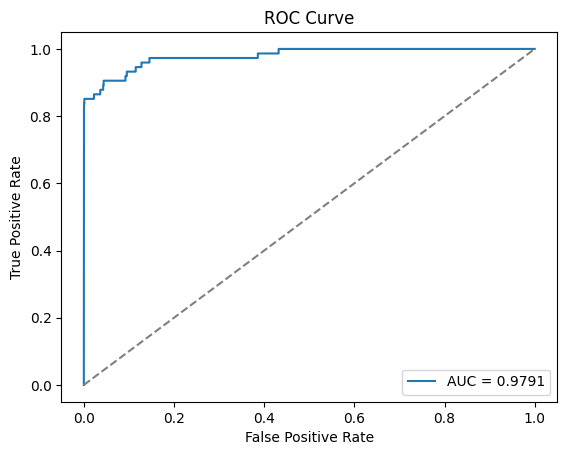

In [ ]:
configs_simple = [
    {'dropout': False, 'regularization': False, 'name': 'Base Model'},
    {'dropout': True, 'regularization': False, 'name': '+ Dropout'},
    {'dropout': False, 'regularization': True, 'name': '+ L2'},
    {'dropout': True, 'regularization': True, 'name': '+ Dropout + L2'}
]

for config in configs_simple:
    print(f"\n=== Training {config['name']} ===")

    model_simple_ = Network(
        input_features=tensor_x_train_resampled.shape[1],
        hidden_size1=64,
        output_size=1,
        dropout=config['dropout'],
        regularization=config['regularization'],
        dropout_rate=0.3
    )
    train_model(model_simple_, tensor_x_train_resampled, tensor_y_train_resampled, tensor_x_val, tensor_y_val, epochs=40, batch_size=32, pos_w=False)
    test_model(model_simple_, tensor_x_test, tensor_y_test)

## 2️⃣ Simple Network Model with Balanced Dataset and Weighted Loss (`pos_w=True`)


=== Training Base Model ===
Train:  epoch 1/40 - Loss:  0.02 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.01
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.02
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.02
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.02
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.02
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


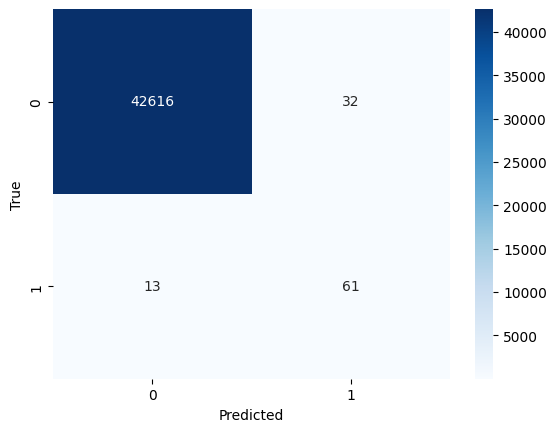


Accuracy: 0.9989
Precision: 0.6559
Recall: 0.8243
F1-Score: 0.7305
AUC: 0.9764


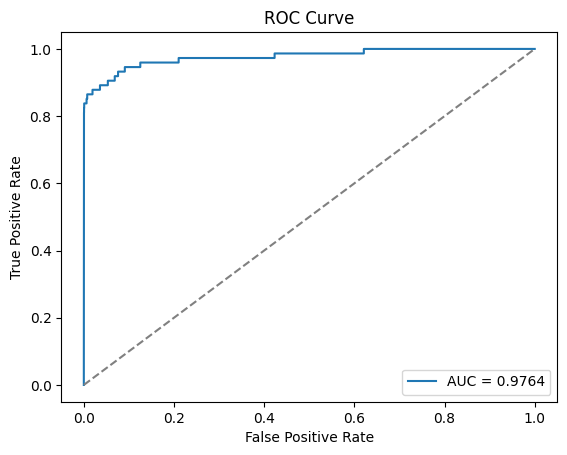


=== Training + Dropout ===
Train:  epoch 1/40 - Loss:  0.03 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.01 -------- Validation: epoch 2/40 - Loss:  0.02
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.01
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.02
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.02
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.02
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


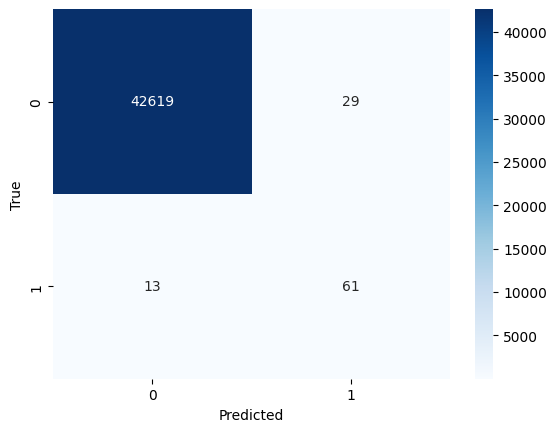


Accuracy: 0.9990
Precision: 0.6778
Recall: 0.8243
F1-Score: 0.7439
AUC: 0.9747


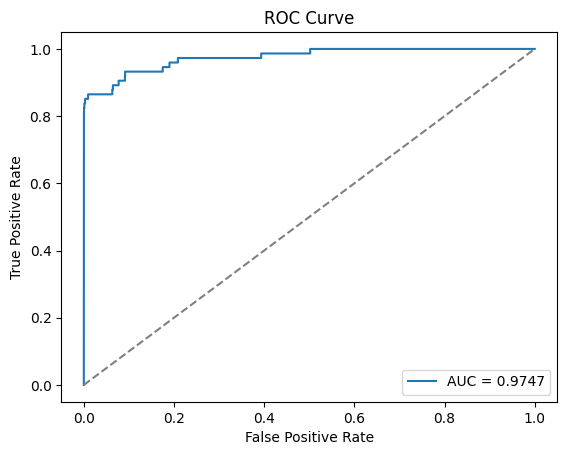


=== Training + L2 ===
Train:  epoch 1/40 - Loss:  0.03 -------- Validation: epoch 1/40 - Loss:  0.01
Train:  epoch 2/40 - Loss:  0.01 -------- Validation: epoch 2/40 - Loss:  0.02
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.02
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.01
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.01
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.01
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


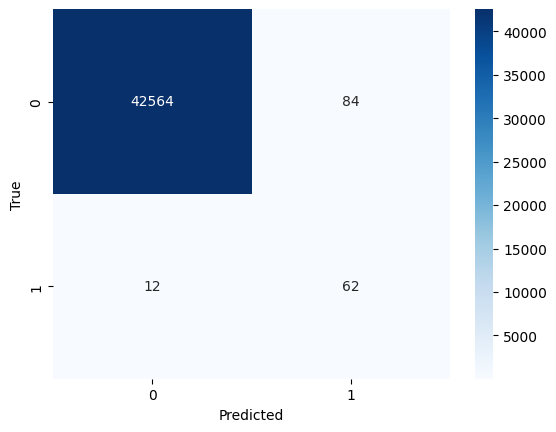


Accuracy: 0.9978
Precision: 0.4247
Recall: 0.8378
F1-Score: 0.5636
AUC: 0.9814


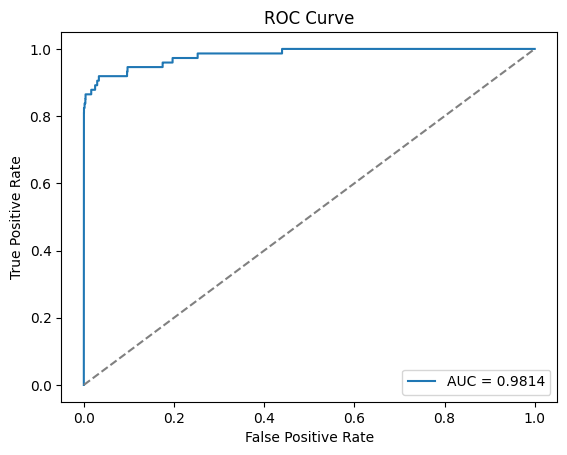


=== Training + Dropout + L2 ===
Train:  epoch 1/40 - Loss:  0.04 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.01 -------- Validation: epoch 2/40 - Loss:  0.02
Train:  epoch 3/40 - Loss:  0.01 -------- Validation: epoch 3/40 - Loss:  0.02
Train:  epoch 4/40 - Loss:  0.01 -------- Validation: epoch 4/40 - Loss:  0.01
Train:  epoch 5/40 - Loss:  0.01 -------- Validation: epoch 5/40 - Loss:  0.01
Train:  epoch 6/40 - Loss:  0.01 -------- Validation: epoch 6/40 - Loss:  0.01
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


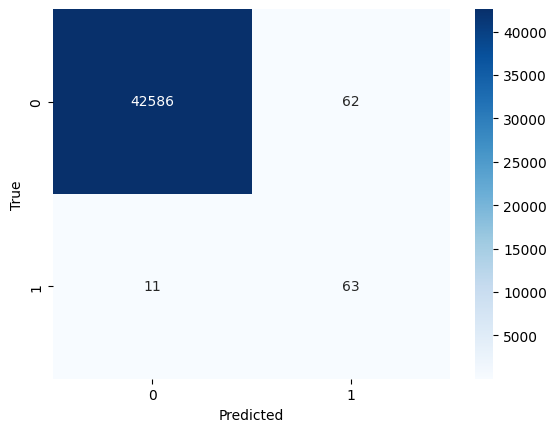


Accuracy: 0.9983
Precision: 0.5040
Recall: 0.8514
F1-Score: 0.6332
AUC: 0.9782


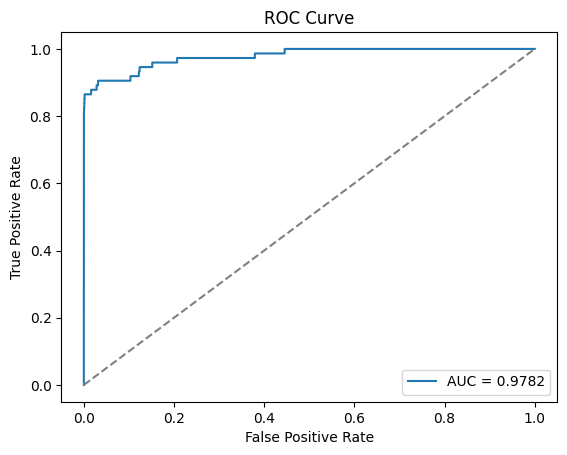

In [ ]:
configs_simple = [
    {'dropout': False, 'regularization': False, 'name': 'Base Model'},
    {'dropout': True, 'regularization': False, 'name': '+ Dropout'},
    {'dropout': False, 'regularization': True, 'name': '+ L2'},
    {'dropout': True, 'regularization': True, 'name': '+ Dropout + L2'}
]

for config in configs_simple:
    print(f"\n=== Training {config['name']} ===")

    model_simple_ = Network(
        input_features=tensor_x_train_resampled.shape[1],
        hidden_size1=64,
        output_size=1,
        dropout=config['dropout'],
        regularization=config['regularization'],
        dropout_rate=0.3
    )
    train_model(model_simple_, tensor_x_train_resampled, tensor_y_train_resampled, tensor_x_val, tensor_y_val, epochs=40, batch_size=32, pos_w=True)
    test_model(model_simple_, tensor_x_test, tensor_y_test)

## 3️⃣ Deep Network Model with Balanced Dataset


=== Training Base Model ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.02
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.02
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.02
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.02
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.03
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


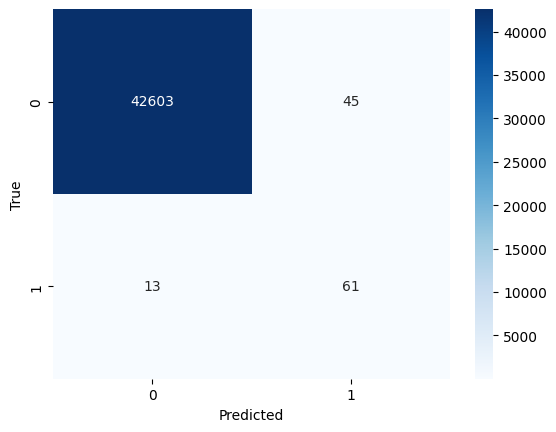


Accuracy: 0.9986
Precision: 0.5755
Recall: 0.8243
F1-Score: 0.6778
AUC: 0.9643


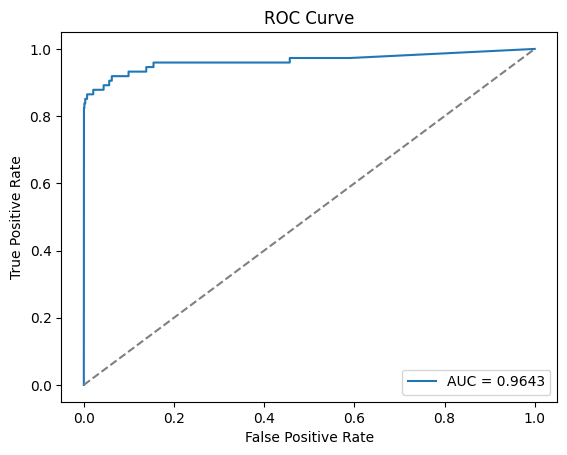


=== Training + Dropout ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.02
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.02
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.03
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.03
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.03
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


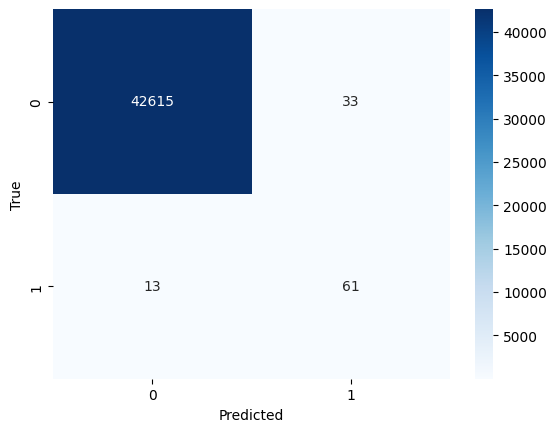


Accuracy: 0.9989
Precision: 0.6489
Recall: 0.8243
F1-Score: 0.7262
AUC: 0.9745


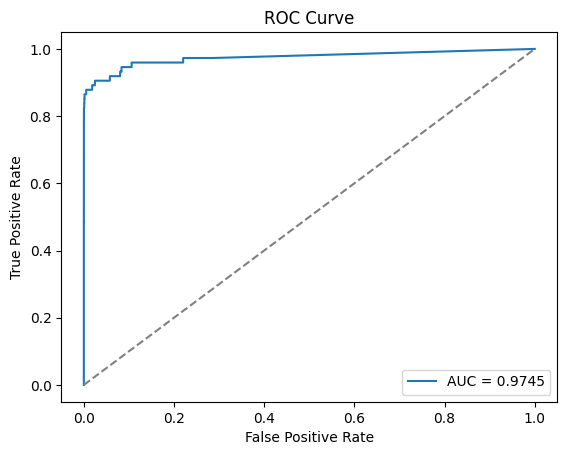


=== Training + L2 ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.02
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.01
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.01
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.01
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.01
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


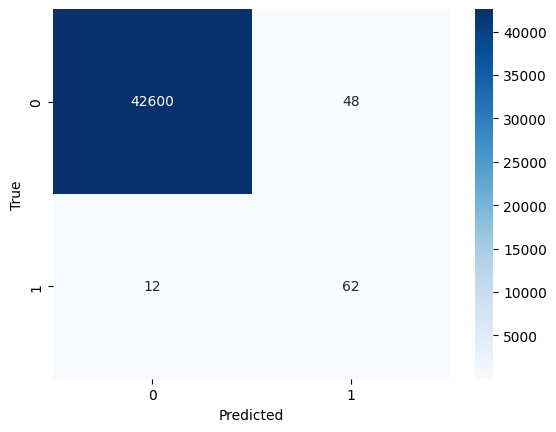


Accuracy: 0.9986
Precision: 0.5636
Recall: 0.8378
F1-Score: 0.6739
AUC: 0.9649


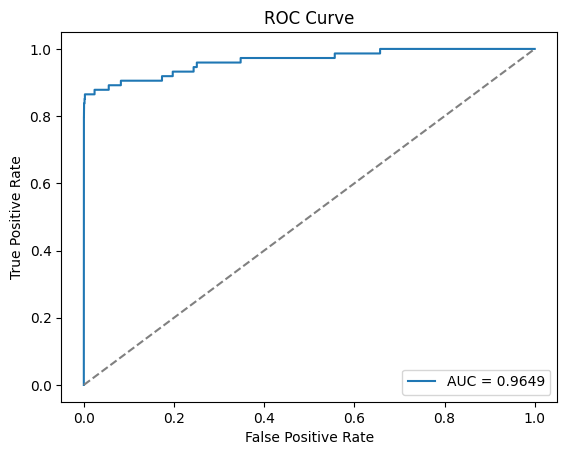


=== Training + Dropout + L2 ===
Train:  epoch 1/40 - Loss:  0.02 -------- Validation: epoch 1/40 - Loss:  0.01
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.01
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.01
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.01
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.02
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.02
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


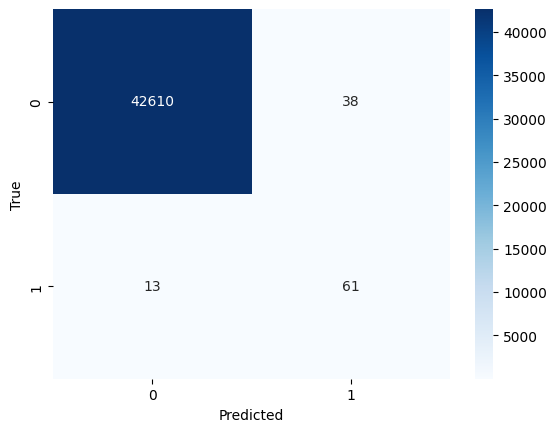


Accuracy: 0.9988
Precision: 0.6162
Recall: 0.8243
F1-Score: 0.7052
AUC: 0.9793


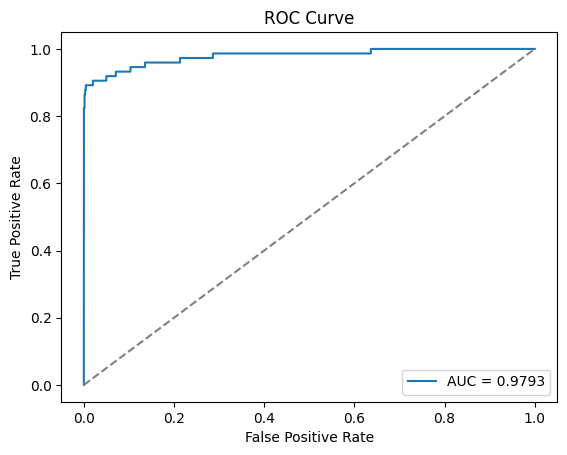

In [ ]:
configs_deep = [
    {'dropout': False, 'regularization': False, 'name': 'Base Model'},
    {'dropout': True, 'regularization': False, 'name': '+ Dropout'},
    {'dropout': False, 'regularization': True, 'name': '+ L2'},
    {'dropout': True, 'regularization': True, 'name': '+ Dropout + L2'}
]

for config in configs_deep:
    print(f"\n=== Training {config['name']} ===")

    model_deep_ = Network_deep(
        input_features=tensor_x_train_resampled.shape[1],
        hidden_size1=128,
        hidden_size2=64,
        output_size=1,
        dropout=config['dropout'],
        regularization=config['regularization'],
        dropout_rate=0.2
    )

    train_model(model_deep_, tensor_x_train_resampled, tensor_y_train_resampled, tensor_x_val, tensor_y_val, epochs=40, batch_size=32, pos_w=False)
    test_model(model_deep_, tensor_x_test, tensor_y_test)

## 4️⃣ Deep Network Model with Balanced Dataset and Weighted Loss (`pos_w=True`)


=== Training Base Model ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.02
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.02
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.03
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.03
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.03
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


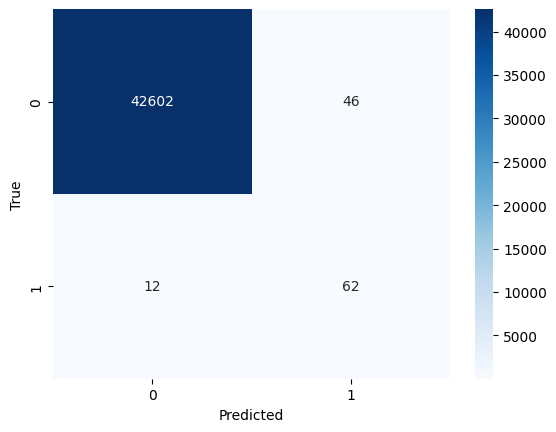


Accuracy: 0.9986
Precision: 0.5741
Recall: 0.8378
F1-Score: 0.6813
AUC: 0.9641


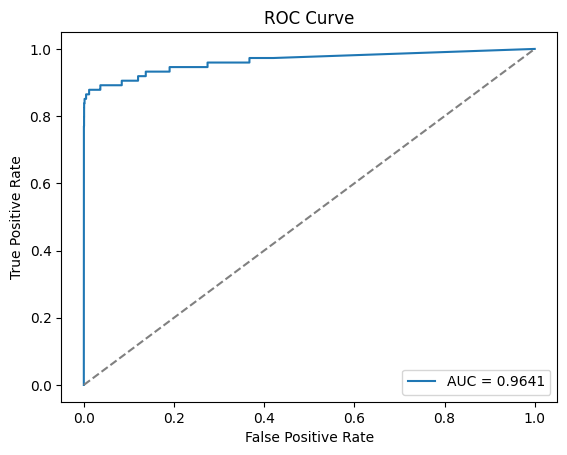


=== Training + Dropout ===
Train:  epoch 1/40 - Loss:  0.02 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.02
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.02
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.03
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.03
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.03
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


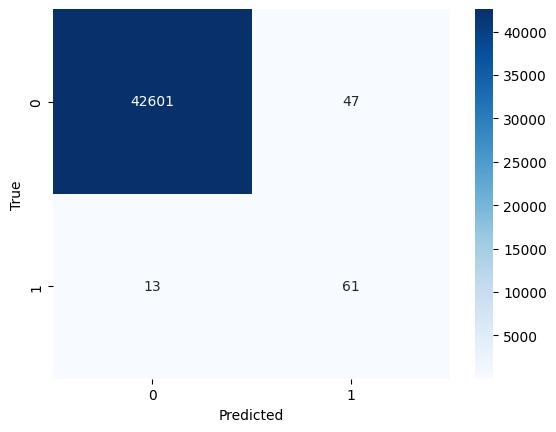


Accuracy: 0.9986
Precision: 0.5648
Recall: 0.8243
F1-Score: 0.6703
AUC: 0.9748


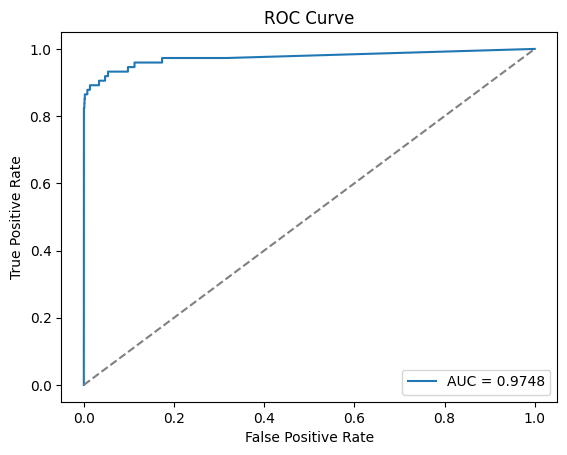


=== Training + L2 ===
Train:  epoch 1/40 - Loss:  0.01 -------- Validation: epoch 1/40 - Loss:  0.01
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.02
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.01
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.01
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.01
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.01
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


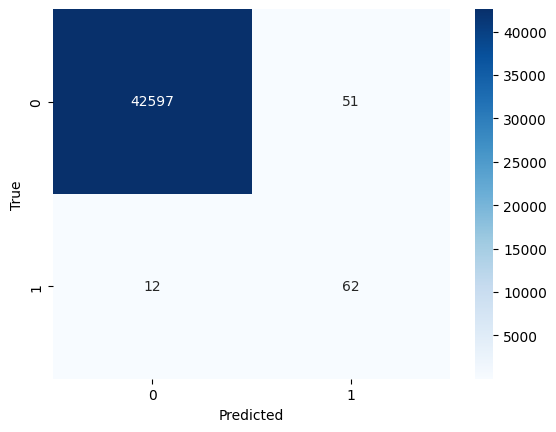


Accuracy: 0.9985
Precision: 0.5487
Recall: 0.8378
F1-Score: 0.6631
AUC: 0.9730


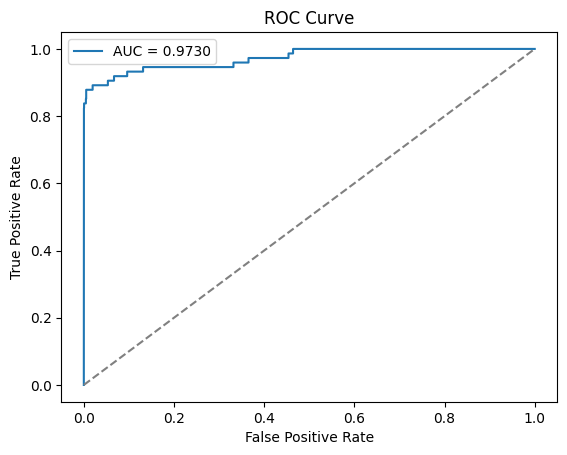


=== Training + Dropout + L2 ===
Train:  epoch 1/40 - Loss:  0.02 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.00 -------- Validation: epoch 2/40 - Loss:  0.02
Train:  epoch 3/40 - Loss:  0.00 -------- Validation: epoch 3/40 - Loss:  0.02
Train:  epoch 4/40 - Loss:  0.00 -------- Validation: epoch 4/40 - Loss:  0.01
Train:  epoch 5/40 - Loss:  0.00 -------- Validation: epoch 5/40 - Loss:  0.01
Train:  epoch 6/40 - Loss:  0.00 -------- Validation: epoch 6/40 - Loss:  0.02
Early stopping triggered. No improvement for 5 epochs.



Confusion Matrix:


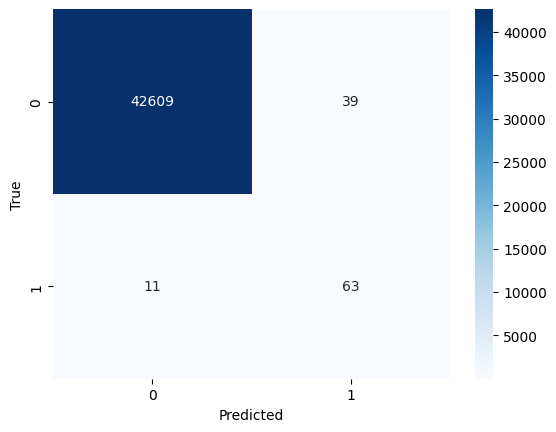


Accuracy: 0.9988
Precision: 0.6176
Recall: 0.8514
F1-Score: 0.7159
AUC: 0.9778


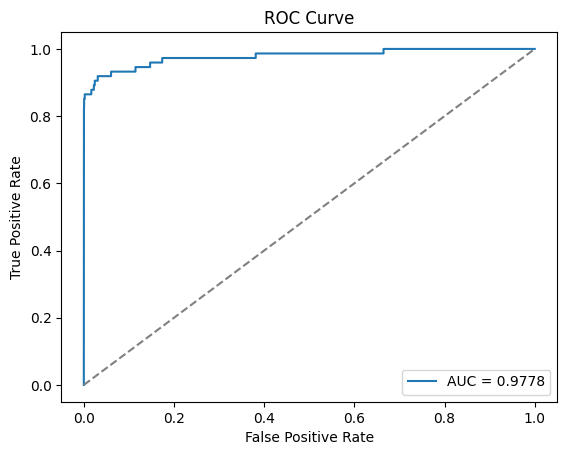

In [ ]:
configs_deep = [
    {'dropout': False, 'regularization': False, 'name': 'Base Model'},
    {'dropout': True, 'regularization': False, 'name': '+ Dropout'},
    {'dropout': False, 'regularization': True, 'name': '+ L2'},
    {'dropout': True, 'regularization': True, 'name': '+ Dropout + L2'}
]

for config in configs_deep:
    print(f"\n=== Training {config['name']} ===")

    model_deep_ = Network_deep(
        input_features=tensor_x_train.shape[1],
        hidden_size1=128,
        hidden_size2=64,
        output_size=1,
        dropout=config['dropout'],
        regularization=config['regularization'],
        dropout_rate=0.2
    )

    train_model(model_deep_, tensor_x_train_resampled, tensor_y_train_resampled, tensor_x_val, tensor_y_val, epochs=40, batch_size=32, pos_w=True)
    test_model(model_deep_, tensor_x_test, tensor_y_test)

---

## Results Summary Table

| Model Type          | Data Balance | Weighted Loss | Dropout | L2 Reg. | Accuracy | Precision | Recall | F1-Score | AUC   |
|---------------------|--------------|---------------|---------|---------|----------|-----------|--------|----------|-------|
| **Simple Network**  | Unbalanced   | No            | No      | No      | 0.9995   | 0.9062    | 0.7838 | 0.8406   | 0.9816|
| Simple + Dropout    | Unbalanced   | No            | Yes     | No      | 0.9995   | 0.9180    | 0.7568 | 0.8296   | 0.9818|
| Simple + L2         | Unbalanced   | No            | No      | Yes     | 0.9994   | 0.8906    | 0.7703 | 0.8261   | 0.9571|
| Simple + Both       | Unbalanced   | No            | Yes     | Yes     | 0.9995   | 0.9194    | 0.7703 | 0.8382   | 0.9784|
| **Simple Network**  | Unbalanced   | Yes           | No      | No      | 0.9842   | 0.0865    | 0.8514 | 0.1571   | 0.9723|
| Simple + Dropout    | Unbalanced   | Yes           | Yes     | No      | 0.9858   | 0.0970    | 0.8649 | 0.1744   | 0.9716|
| Simple + L2         | Unbalanced   | Yes           | No      | Yes     | 0.9750   | 0.0577    | 0.8784 | 0.1083   | 0.9847|
| Simple + Both       | Unbalanced   | Yes           | Yes     | Yes     | 0.9831   | 0.0826    | 0.8649 | 0.1508   | 0.9765|
| **Deep Network**    | Unbalanced   | No            | No      | No      | 0.9995   | 0.8939    | 0.7973 | 0.8429   | 0.9780|
| Deep + Dropout      | Unbalanced   | No            | Yes     | No      | 0.9995   | 0.8939    | 0.7973 | 0.8429   | 0.9785|
| Deep + L2           | Unbalanced   | No            | No      | Yes     | 0.9994   | 0.8551    | 0.7973 | 0.8252   | 0.9593|
| Deep + Both         | Unbalanced   | No            | Yes     | Yes     | 0.9995   | 0.9180    | 0.7568 | 0.8296   | 0.9694|
| **Deep Network**    | Unbalanced   | Yes           | No      | No      | 0.9829   | 0.0804    | 0.8514 | 0.1469   | 0.9211|
| Deep + Dropout      | Unbalanced   | Yes           | Yes     | No      | 0.9720   | 0.0512    | 0.8649 | 0.0967   | 0.9653|
| Deep + L2           | Unbalanced   | Yes           | No      | Yes     | 0.9831   | 0.0813    | 0.8514 | 0.1484   | 0.9528|
| Deep + Both         | Unbalanced   | Yes           | Yes     | Yes     | 0.9572   | 0.0340    | 0.8649 | 0.0655   | 0.9531|
| **Simple Network**  | Balanced     | No            | No      | No      | 0.9989   | 0.6289    | 0.8243 | 0.7135   | 0.9753|
| Simple + Dropout    | Balanced     | No            | Yes     | No      | 0.9991   | 0.7176    | 0.8243 | 0.7673   | 0.9765|
| Simple + L2         | Balanced     | No            | No      | Yes     | 0.9984   | 0.5254    | 0.8378 | 0.6458   | 0.9796|
| Simple + Both       | Balanced     | No            | Yes     | Yes     | 0.9981   | 0.4701    | 0.8514 | 0.6058   | 0.9791|
| **Simple Network**  | Balanced     | Yes           | No      | No      | 0.9989   | 0.6559    | 0.8243 | 0.7305   | 0.9764|
| Simple + Dropout    | Balanced     | Yes           | Yes     | No      | 0.9990   | 0.6778    | 0.8243 | 0.7439   | 0.9747|
| Simple + L2         | Balanced     | Yes           | No      | Yes     | 0.9978   | 0.4247    | 0.8378 | 0.5636   | 0.9814|
| Simple + Both       | Balanced     | Yes           | Yes     | Yes     | 0.9983   | 0.5040    | 0.8514 | 0.6332   | 0.9782|
| **Deep Network**    | Balanced     | No            | No      | No      | 0.9986   | 0.5755    | 0.8243 | 0.6778   | 0.9643|
| Deep + Dropout      | Balanced     | No            | Yes     | No      | 0.9989   | 0.6489    | 0.8243 | 0.7262   | 0.9745|
| Deep + L2           | Balanced     | No            | No      | Yes     | 0.9986   | 0.5636    | 0.8378 | 0.6739   | 0.9649|
| Deep + Both         | Balanced     | No            | Yes     | Yes     | 0.9988   | 0.6162    | 0.8243 | 0.7052   | 0.9793|
| **Deep Network**    | Balanced     | Yes           | No      | No      | 0.9986   | 0.5741    | 0.8378 | 0.6813   | 0.9641|
| Deep + Dropout      | Balanced     | Yes           | Yes     | No      | 0.9986   | 0.5648    | 0.8243 | 0.6703   | 0.9748|
| Deep + L2           | Balanced     | Yes           | No      | Yes     | 0.9985   | 0.5487    | 0.8378 | 0.6631   | 0.9730|
| Deep + Both         | Balanced     | Yes           | Yes     | Yes     | 0.9988   | 0.6176    | 0.8514 | 0.7159   | 0.9778|

---

### The model with unbalanced data, no loss_weight, no dropout, no L2 regularization, has high results – but why is it not considered the best model?

#### **Critical Issue: No Generalization**  
While Model 1 achieves a validation loss of **0**, this is a **strong indicator of catastrophic overfitting**, not success. Here’s why:

- **Loss Reaching 0 is Unrealistic**  
   - In real-world fraud detection, data is noisy and imbalanced. A loss of **0** implies the model perfectly predicts every training sample, including outliers and noise.  
   - Example: Imagine memorizing answers to a math test instead of learning formulas – it works for the test but fails on new problems.

## Critical Analysis of Results
### 1. **High Accuracy in Unbalanced Data is Misleading**
  - This is typical in imbalanced datasets where the model favors the majority class.
### 2. **Weighted Loss Improves Recall but Reduces Precision**
  - Using `pos_weight=True` on unbalanced data increased recall (e.g., 0.85–0.87) but caused precision to drop sharply (0.03–0.08). The model became overly sensitive to fraud, flagging many false positives.
### 3. **Balanced Data Yields More Trustworthy Results**
  - After SMOTE-ENN balancing, F1-scores improved significantly.
    

---

## 🔍 Grid Search for Hyperparameter Tuning

In this experiment, we performed a grid search to tune the hyperparameters of the simple neural network model trained with balanced data. The objective was to find the best combination of hyperparameters that yield the highest performance in terms of the F1-score on the validation set. The following hyperparameters were considered:

| Parameter         | Value            |
|-------------------|------------------|
| Hidden Layer Size | 64, 128, 256     |
| Dropout Rate      | 0.4, 0.3, 0.2    |
| L2 Lambda         | 0.0001, 0.001    |
| Batch Size        | 64, 32, 16       |

The grid search tested all possible combinations of these hyperparameters and evaluated the model's performance using the **F1-score** on the validation set.



### 📊 Why F1-Score was Used

The F1-score is the harmonic mean of **precision** and **recall**, providing a single metric that accounts for both false positives and false negatives. It is particularly useful in situations where:

1. **Class Imbalance ⚖️**: In cases where the dataset has a disproportionate number of examples from different classes, precision and recall individually can be misleading. The F1-score provides a balanced measure, especially in cases where the positive class is underrepresented.
2. **Minimizing Both Errors ⚠️**: The F1-score ensures that both false positives (incorrectly predicting positive) and false negatives (failing to predict positive) are considered in the model's evaluation. This is important in applications like medical diagnosis or fraud detection where missing a positive instance or falsely flagging a negative instance could have significant consequences.
   
Thus, by using the F1-score, we could objectively evaluate the trade-offs between precision and recall, helping us select the model configuration that performs well on both metrics.



In [ ]:
def train_model_grid_search(model,
                x_train,
                y_train,
                x_valid,
                y_valid,
                epochs = 40,
                batch_size = 32, pos_w = False):


    model = model.to(device)

    train_loss = []
    val_loss_ = []

    if pos_w:
        class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train.cpu().numpy())
        pos_weights = torch.tensor(class_weights[1] / class_weights[0], dtype=torch.float32).to(device)

        criterion = model.get_loss_function(pos_weights, class_weights = True)
    else:

        criterion = model.get_loss_function()

    earlystopping_ = earlystopping(patience=5)
    optimizer = model.get_optimizer(lr = 0.001)

    train_dataset = TensorDataset(x_train, y_train.float().view(-1,1))
    train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle= True)

    valid_dataset = TensorDataset(x_valid, y_valid.float().view(-1,1))
    valid_dataloader = DataLoader(valid_dataset, batch_size = batch_size)

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0

        for x_batch, y_batch in train_dataloader:

            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            out = model(x_batch)
            loss = criterion(out, y_batch)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()


        average_loss = epoch_loss / len(train_dataloader)
        train_loss.append(average_loss)

        model.eval()
        epoch_loss_val = 0

        with torch.no_grad():
            for x_batch, y_batch in valid_dataloader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                validation_out = model(x_batch)
                val_loss = criterion(validation_out, y_batch)
                epoch_loss_val += val_loss.item()

            average_loss_val = epoch_loss_val / len(valid_dataloader)
            val_loss_.append(average_loss_val)

            print(f'Train:  epoch {epoch + 1}/{epochs} - Loss: {average_loss: .2f} -------- Validation: epoch {epoch + 1}/{epochs} - Loss: {average_loss_val: .2f}')

            if earlystopping_(average_loss_val):
                break




    return train_loss, val_loss

In [ ]:
def test_model_grid_search(model, x_test, y_test):


    model.eval()

    with torch.no_grad():
        output = model(x_test)
        probability = torch.sigmoid(output)
        pred = (probability > 0.5).int()

    y_true = y_test.cpu().numpy()
    y_pred = pred.cpu().numpy()
    y_prob = probability.cpu().numpy()


    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)



    print(f"F1-Score: {f1:.4f}")


    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc
    }

    return metrics






Training with: {'hidden_size1': 64, 'dropout_rate': 0.2, 'lambda_l2': 0.001, 'batch_size': 16}
Train:  epoch 1/40 - Loss:  0.03 -------- Validation: epoch 1/40 - Loss:  0.02
Train:  epoch 2/40 - Loss:  0.02 -------- Validation: epoch 2/40 - Loss:  0.03
Train:  epoch 3/40 - Loss:  0.02 -------- Validation: epoch 3/40 - Loss:  0.03
Train:  epoch 4/40 - Loss:  0.02 -------- Validation: epoch 4/40 - Loss:  0.02
Train:  epoch 5/40 - Loss:  0.02 -------- Validation: epoch 5/40 - Loss:  0.03
Train:  epoch 6/40 - Loss:  0.02 -------- Validation: epoch 6/40 - Loss:  0.03
Early stopping triggered. No improvement for 5 epochs.
F1-Score: 0.2785
New best F1: 0.2785

Training with: {'hidden_size1': 64, 'dropout_rate': 0.2, 'lambda_l2': 0.001, 'batch_size': 32}
Train:  epoch 1/40 - Loss:  0.04 -------- Validation: epoch 1/40 - Loss:  0.03
Train:  epoch 2/40 - Loss:  0.02 -------- Validation: epoch 2/40 - Loss:  0.02
Train:  epoch 3/40 - Loss:  0.02 -------- Validation: epoch 3/40 - Loss:  0.02
Train

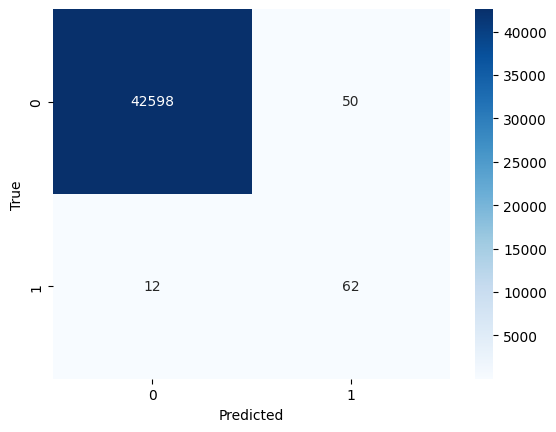


Accuracy: 0.9985
Precision: 0.5536
Recall: 0.8378
F1-Score: 0.6667
AUC: 0.9798


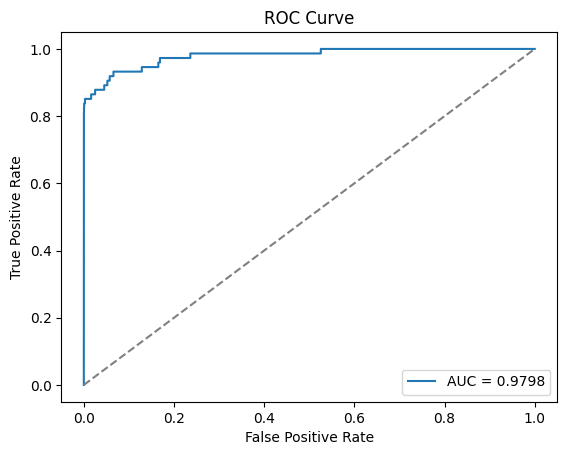

{'accuracy': 0.998548757080661,
 'precision': 0.5535714285714286,
 'recall': 0.8378378378378378,
 'f1': 0.6666666666666666,
 'auc': np.float64(0.9798209858705076)}

In [ ]:
hyperparameters = {
    'hidden_size1': [64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4],
    'lambda_l2': [0.001, 0.0001],
    'batch_size': [16, 32, 64]
}

best = {
    'f1_score': -1,
    'params': None,
    'model': None
}
results = []

param_combinations = product(*hyperparameters.values())

for combo in param_combinations:
    params = dict(zip(hyperparameters.keys(), combo))
    print(f"\nTraining with: {params}")

    model = Network(
        input_features=tensor_x_train_resampled.shape[1],
        hidden_size1=params['hidden_size1'],
        output_size=1,
        dropout=True,
        regularization=True,
        dropout_rate=params['dropout_rate'],
        lambda_l2=params['lambda_l2']
    )

    train_model_grid_search(
        model,
        tensor_x_train_resampled,
        tensor_y_train_resampled,
        tensor_x_val,
        tensor_y_val,
        epochs=40,
        batch_size=params['batch_size'],
        pos_w=True
    )

    val_metrics = test_model_grid_search(model, tensor_x_val, tensor_y_val)
    results.append({'parameters': params, 'metrics': val_metrics})

    if val_metrics['f1'] > best['f1_score']:
        best.update({
            'f1_score': val_metrics['f1'],
            'params': params,
            'model': model
        })
        print(f"New best F1: {best['f1_score']:.4f}")

print("\n=== Grid Search Complete ===")
print(f"Best Parameters: {best['params']}")
print(f"Best Validation F1: {best['f1_score']:.4f}")

print("\n=== Final Evaluation on Test Set ===")
test_model(best['model'], tensor_x_test, tensor_y_test)


## Final Results 🏆

After performing the grid search, the best hyperparameters were identified:

- **Best Hyperparameters** 🔧:
  - Hidden Size 1: **64**
  - Dropout Rate: **0.4**
  - L2 Regularization: **0.0001**
  - Batch Size: **64**

The **best validation F1-score** achieved was **0.6452**!


Confusion Matrix:


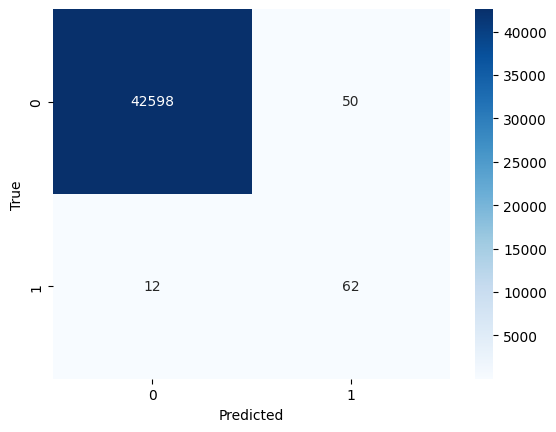


Accuracy: 0.9985
Precision: 0.5536
Recall: 0.8378
F1-Score: 0.6667
AUC: 0.9798


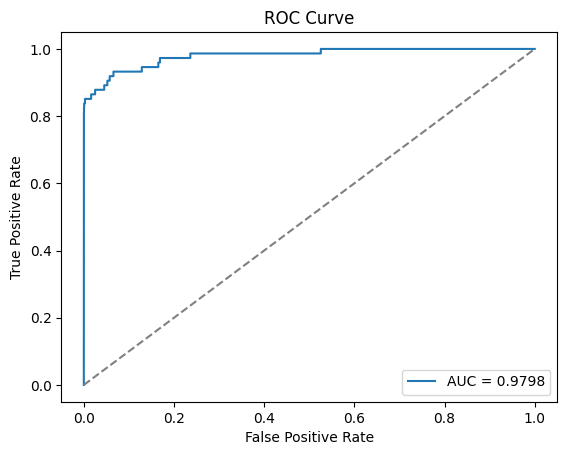

{'accuracy': 0.998548757080661,
 'precision': 0.5535714285714286,
 'recall': 0.8378378378378378,
 'f1': 0.6666666666666666,
 'auc': np.float64(0.9798209858705076)}

In [ ]:
test_model(best['model'], tensor_x_test, tensor_y_test)

## Test Set Evaluation 📈

After selecting the best hyperparameters, we evaluated the model on the **test set**, and here are the results:

| Metric    | Value               |
|-----------|---------------------|
| Accuracy  | 0.9985              |
| Precision | 0.5536 (55.36%)     |
| Recall    | 0.8378 (83.78%)     |
| F1-Score  | 0.6667 (66.67%)     |
| AUC       | 0.9798              |

- **Accuracy** : **99.85%**
  The model is performing excellently on most of the samples, correctly predicting most of the data points. However, accuracy alone is not enough when dealing with **class imbalance**.
  
- **Precision** : **0.5536**
  The model's precision is **55.36%**, meaning that when the model predicts a positive class, it is correct about **55.36%** of the time. This is lower than desired, indicating a room for improvement.

- **Recall** : **0.8378**
  With a **recall of 83.78%**, the model correctly identifies most of the positive instances. This is great, especially in applications where false negatives are costly

- **F1-Score** : **0.6667**
  The **F1-score of 0.6667** represents a solid balance between precision and recall. It is a decent result, but there's still room for improvement.

- **AUC** : **0.9798**
  The **AUC** of **0.9798** indicates that the model is quite good at distinguishing between the positive and negative classes.


---

# 🔍 Non-Neural Network Model Performance Analysis

## ⚙️ Logistic Regression Results



In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train_, X_tmp, y_train_, y_tmp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val_, X_test_, y_val_, y_test_ = train_test_split(X_tmp, y_tmp, test_size=0.5, stratify=y_tmp, random_state=42)


In [ ]:
lr = LogisticRegression(max_iter = 1000, class_weight = 'balanced', solver='liblinear')
lr.fit(X_train_, y_train_)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [ ]:
y_pred = lr.predict(X_val_)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val_, y_pred))

print("\nClassification Report:")
print(classification_report(y_val_, y_pred))

Confusion Matrix:
[[41741   906]
 [    9    65]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42647
           1       0.07      0.88      0.12        74

    accuracy                           0.98     42721
   macro avg       0.53      0.93      0.56     42721
weighted avg       1.00      0.98      0.99     42721



In [ ]:
lr_balanced = LogisticRegression(max_iter = 1000, class_weight = 'balanced', solver='liblinear')
lr_balanced.fit(X_resampled, y_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [ ]:
y_pred_balanced = lr_balanced.predict(X_val_)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_val_, y_pred_balanced))

print("\nClassification Report:")
print(classification_report(y_val_, y_pred_balanced))

Confusion Matrix:
[[31359 11288]
 [    3    71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     42647
           1       0.01      0.96      0.01        74

    accuracy                           0.74     42721
   macro avg       0.50      0.85      0.43     42721
weighted avg       1.00      0.74      0.85     42721



### 📊  Logistic Regression Results

| Dataset        | Precision (Fraud) | Recall (Fraud) | F1-Score (Fraud) | Accuracy |
|----------------|-------------------|----------------|------------------|----------|
| Imbalanced     | 0.07              | **0.88**       | 0.12             | 0.98     |
| Balanced       | 0.01              | 0.96           | 0.01             | 0.74     |

- **Observation**:
  - Logistic Regression performs **poorly in precision** in both cases.
  - High recall (especially with imbalanced data), but at the cost of many **false positives**.
  - Balanced data actually makes it **worse**, with accuracy dropping to 0.74 due to misclassification of many legitimate transactions.

---

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_, y_train_)

y_pred_xgb = xgb.predict(X_val_)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:

print("Confusion Matrix:")
print(confusion_matrix(y_val_, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_val_, y_pred_xgb))

Confusion Matrix:
[[42646     1]
 [   19    55]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.98      0.74      0.85        74

    accuracy                           1.00     42721
   macro avg       0.99      0.87      0.92     42721
weighted avg       1.00      1.00      1.00     42721



In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_resampled, y_resampled)

y_pred_xgb = xgb.predict(X_val_)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:

print("Confusion Matrix:")
print(confusion_matrix(y_val_, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_val_, y_pred_xgb))

Confusion Matrix:
[[42636    11]
 [   19    55]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.83      0.74      0.79        74

    accuracy                           1.00     42721
   macro avg       0.92      0.87      0.89     42721
weighted avg       1.00      1.00      1.00     42721



### 🚀  XGBoost Results

| Dataset        | Precision (Fraud) | Recall (Fraud) | F1-Score (Fraud) | Accuracy |
|----------------|-------------------|----------------|------------------|----------|
| Imbalanced     | **0.98**          | 0.74           | 0.85             | **1.00** |
| Balanced       | 0.83              | 0.74           | 0.79             | **1.00** |

- **Observation**:
  - XGBoost consistently delivers **strong performance**, especially with the imbalanced dataset.
  - Balancing the data slightly reduces precision, but still maintains high recall and a solid F1-score.
  - Highest overall **accuracy** in both settings.

---

---

## 🏆 Final Comparison Table

| Model                 | Dataset     | Precision  | Recall  | F1-Score  | Accuracy |
|----------------------|-------------|-------------------|----------------|------------------|----------|
| Logistic Regression  | Imbalanced  | 0.07              | **0.88**       | 0.12             | 0.98     |
| Logistic Regression  | Balanced    | 0.01              | 0.96           | 0.01             | 0.74     |
| **XGBoost**           | Imbalanced  | **0.98**          | 0.74           | **0.85**         | **1.00** |
| XGBoost              | Balanced    | 0.83              | 0.74           | 0.79             | **1.00** |
| MLP (Best Model)     | Balanced    | 0.55              | **0.83**       | 0.66             | 0.99     |

---

## 🧾 Conclusion

- ✅ **XGBoost with the imbalanced dataset** outperforms all other models across all metrics, especially with **highest precision and F1-score**, and near-perfect accuracy.
- ⚠️ **Logistic Regression** is not reliable for this task. Although it captures most fraud cases (high recall), it generates too many false positives (low precision), making it **unsuitable for real-world fraud detection systems**.
- 🧠 **MLP** is a strong alternative, especially in recall and balanced learning, but still falls short of XGBoost’s robustness.

---

## 🏁  **XGBoost (Imbalanced)** is the Best Model

### Why?
- Achieves **the highest F1-score (0.85)** and **excellent fraud precision (0.98)**, meaning it detects fraud accurately without over-flagging non-fraud cases.
- Requires **less training time** than MLPs and is **more interpretable** than deep models.
- Works exceptionally well **even without data balancing**, reducing preprocessing efforts.
